## Bank Credit EDA Case Study.

#### Business Objectives:



This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

#### Importing the libraries.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

#### Read in the Data sets.

Import and read the application_data and previous_application. Store them in variable called `apps` and prev_apps.

In [3]:
apps= pd.read_csv('application_data.csv')
prev_apps= pd.read_csv('previous_application.csv')
#created a backup of Dataframe,just in case:
apps_bkup = apps.copy()
prev_apps_bkup = prev_apps.copy()

In [4]:
apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,nan,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,nan,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,nan,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

-  ### Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [5]:
print(apps.shape)
print(apps.info())

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [6]:
# Finding column-wise null count here
apps.isnull().sum(axis=0)

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
# Finding the column-wise null %
apps.isnull().sum()*100/len(apps)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [8]:
#Find columns that have more than 50% null values
apps.drop(apps.columns[apps.isnull().sum()/len(apps)*100 >= 50], axis=1, inplace=True)
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [9]:
apps.reset_index(drop=True)

In [10]:
#Create a new data frame with selective columns that seem relevant for identification of loan process
apps_final = apps.loc[:, ['SK_ID_CURR', 'TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']]

In [11]:
apps_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
AMT_INCOME_TOTAL              307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non-null int64
DAYS_ID_PUBLISH               307511 non-null int64
FLAG_MOBIL                    307511 non-null int64
FLAG_PHONE                    307511 non-null int64
FLAG_EMAIL                    307511 non-null

In [12]:
# Checking remaining Null % column-wise
apps_final.isnull().sum()*100/len(apps_final)

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
AMT_INCOME_TOTAL              0.000000
AMT_ANNUITY                   0.003902
AMT_GOODS_PRICE               0.090403
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_ID_PUBLISH               0.000000
FLAG_MOBIL                    0.000000
FLAG_PHONE                    0.000000
FLAG_EMAIL                    0.000000
OCCUPATION_TYPE              31.345545
CNT_FAM_MEMBERS               0.000650
REGION_RATING_CLIENT          0.000000
REG_REGION_NOT_LIVE_REGION    0.000000
REG_REGION_NOT_WORK_REGION    0.000000
EXT_SOURCE_2                  0.214626
EXT_SOURCE_3                 19.825307
DAYS_LAST_PHONE_CHANGE        0.000325
dtype: float64

### Handling Null Values

We then proceed with imputing the null values.

In [13]:
# Filling Null Vaules for Column AMT_GOODS_PRICE.

#### We are imputing goods price with 0 as if the amount is not specified it may very well be a personal loan and a higher value imputation will bias the analysis

In [14]:
apps_final.AMT_GOODS_PRICE.fillna(0,inplace=True)
round(apps_final.isnull().sum()*100/len(apps),2)

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
AMT_INCOME_TOTAL              0.000000
AMT_ANNUITY                   0.000000
AMT_GOODS_PRICE               0.000000
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_ID_PUBLISH               0.000000
FLAG_MOBIL                    0.000000
FLAG_PHONE                    0.000000
FLAG_EMAIL                    0.000000
OCCUPATION_TYPE              31.350000
CNT_FAM_MEMBERS               0.000000
REGION_RATING_CLIENT          0.000000
REG_REGION_NOT_LIVE_REGION    0.000000
REG_REGION_NOT_WORK_REGION    0.000000
EXT_SOURCE_2                  0.210000
EXT_SOURCE_3                 19.830000
DAYS_LAST_PHONE_CHANGE        0.000000
dtype: float64

In [15]:
# Checking Count of Distinct Values for Column OCCUPATION_TYPE to impute Null Values
apps.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

###### As the count of Null values in Column OCCUPATION_TYPE is quite high, so computing Mode value may skew the result, So we will create a new Value named 'Others' and use it to compute Null Values in the column.

In [16]:
apps_final.OCCUPATION_TYPE.fillna('Others',inplace=True)
round(apps_final.isnull().sum()*100/len(apps),2)

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
AMT_INCOME_TOTAL              0.000000
AMT_ANNUITY                   0.000000
AMT_GOODS_PRICE               0.000000
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_ID_PUBLISH               0.000000
FLAG_MOBIL                    0.000000
FLAG_PHONE                    0.000000
FLAG_EMAIL                    0.000000
OCCUPATION_TYPE               0.000000
CNT_FAM_MEMBERS               0.000000
REGION_RATING_CLIENT          0.000000
REG_REGION_NOT_LIVE_REGION    0.000000
REG_REGION_NOT_WORK_REGION    0.000000
EXT_SOURCE_2                  0.210000
EXT_SOURCE_3                 19.830000
DAYS_LAST_PHONE_CHANGE        0.000000
dtype: float64

###### We are imputing ext_source_2 and ext_source_3 with 0 as if the amount is not specified it may very well be the person doesnt have any external source of income and a higher value imputation will bias the analysis

In [17]:
apps_final.EXT_SOURCE_2.fillna(0,inplace=True)
apps_final.EXT_SOURCE_3.fillna(0,inplace=True)
round(apps_final.isnull().sum()*100/len(apps),2)

SK_ID_CURR                   0.000000
TARGET                       0.000000
NAME_CONTRACT_TYPE           0.000000
CODE_GENDER                  0.000000
AMT_INCOME_TOTAL             0.000000
AMT_ANNUITY                  0.000000
AMT_GOODS_PRICE              0.000000
NAME_INCOME_TYPE             0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_FAMILY_STATUS           0.000000
NAME_HOUSING_TYPE            0.000000
DAYS_BIRTH                   0.000000
DAYS_EMPLOYED                0.000000
DAYS_ID_PUBLISH              0.000000
FLAG_MOBIL                   0.000000
FLAG_PHONE                   0.000000
FLAG_EMAIL                   0.000000
OCCUPATION_TYPE              0.000000
CNT_FAM_MEMBERS              0.000000
REGION_RATING_CLIENT         0.000000
REG_REGION_NOT_LIVE_REGION   0.000000
REG_REGION_NOT_WORK_REGION   0.000000
EXT_SOURCE_2                 0.000000
EXT_SOURCE_3                 0.000000
DAYS_LAST_PHONE_CHANGE       0.000000
dtype: float64

#### All Null Values have been handled

### Standardization of Values

#### There are Negative Values in some columns, so we are converting them to Positive Values

In [18]:
apps_final.DAYS_EMPLOYED.describe()

count   307511.000000
mean     63815.045904
std     141275.766519
min     -17912.000000
25%      -2760.000000
50%      -1213.000000
75%       -289.000000
max     365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [19]:
apps_final.DAYS_EMPLOYED = apps.DAYS_EMPLOYED.abs()
apps_final.DAYS_EMPLOYED.describe()

count   307511.000000
mean     67724.742149
std     139443.751806
min          0.000000
25%        933.000000
50%       2219.000000
75%       5707.000000
max     365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [20]:
apps_final.DAYS_BIRTH.describe()

count   307511.000000
mean    -16036.995067
std       4363.988632
min     -25229.000000
25%     -19682.000000
50%     -15750.000000
75%     -12413.000000
max      -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [21]:
apps_final.DAYS_BIRTH = apps.DAYS_BIRTH.abs()
apps_final.DAYS_BIRTH.describe()

count   307511.000000
mean     16036.995067
std       4363.988632
min       7489.000000
25%      12413.000000
50%      15750.000000
75%      19682.000000
max      25229.000000
Name: DAYS_BIRTH, dtype: float64

In [22]:
apps_final.DAYS_ID_PUBLISH.describe()

count   307511.000000
mean     -2994.202373
std       1509.450419
min      -7197.000000
25%      -4299.000000
50%      -3254.000000
75%      -1720.000000
max          0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [23]:
apps_final.DAYS_ID_PUBLISH = apps_final.DAYS_ID_PUBLISH.abs()
apps_final.DAYS_ID_PUBLISH.describe()

count   307511.000000
mean      2994.202373
std       1509.450419
min          0.000000
25%       1720.000000
50%       3254.000000
75%       4299.000000
max       7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [24]:
#Change datatype of CNT_FAM_MEMBERS from float to int
apps_final['CNT_FAM_MEMBERS']=apps_final['CNT_FAM_MEMBERS'].fillna(0)
apps_final['CNT_FAM_MEMBERS']=apps_final['CNT_FAM_MEMBERS'].astype(int)
apps_final['CNT_FAM_MEMBERS'].head()

0    1
1    2
2    1
3    2
4    1
Name: CNT_FAM_MEMBERS, dtype: int32

In [25]:
#Change datatype of DAYS_LAST_PHONE_CHANGE from float to int
apps_final.DAYS_LAST_PHONE_CHANGE = apps.DAYS_LAST_PHONE_CHANGE.abs()
apps_final['DAYS_LAST_PHONE_CHANGE']=apps_final['DAYS_LAST_PHONE_CHANGE'].fillna(0)
apps_final['DAYS_LAST_PHONE_CHANGE']=apps_final['DAYS_LAST_PHONE_CHANGE'].astype(int)
apps_final['DAYS_LAST_PHONE_CHANGE'].head()

0    1134
1     828
2     815
3     617
4    1106
Name: DAYS_LAST_PHONE_CHANGE, dtype: int32

#### Convert the days to year column

In [26]:
apps_final['AGE'] = apps_final['DAYS_BIRTH']//365
apps_final['AGE'].head()

0    25
1    45
2    52
3    52
4    54
Name: AGE, dtype: int64

In [27]:
apps_final['YEARS_EMPLOYED'] = apps_final['DAYS_EMPLOYED']//365
apps_final['YEARS_EMPLOYED'].head()

0    1
1    3
2    0
3    8
4    8
Name: YEARS_EMPLOYED, dtype: int64

In [28]:
apps_final['YEARS_PUBLISH'] = apps_final['DAYS_ID_PUBLISH']//365
apps_final['YEARS_PUBLISH'].head()

0    5
1    0
2    6
3    6
4    9
Name: YEARS_PUBLISH, dtype: int64

#### Binning of Continuous Variable

In [29]:
##Create a dataframe with age against Target
Age_df = apps_final[['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','DAYS_BIRTH']].copy()

In [30]:
Age_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,DAYS_BIRTH
0,1,Cash loans,M,9461
1,0,Cash loans,F,16765
2,0,Revolving loans,M,19046
3,0,Cash loans,F,19005
4,0,Cash loans,M,19932


In [31]:
Age_df['AGE'] = list(map(lambda x: x//365, Age_df['DAYS_BIRTH'].values))

In [32]:
Age_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,DAYS_BIRTH,AGE
0,1,Cash loans,M,9461,25
1,0,Cash loans,F,16765,45
2,0,Revolving loans,M,19046,52
3,0,Cash loans,F,19005,52
4,0,Cash loans,M,19932,54


In [33]:
#Create range of different age groups
Age_df['Age_grp'] = pd.cut(Age_df.AGE[:], [0, 30, 40, 50, 60, 999], labels=["<30","30-40","40-50","50-60","60+"])

In [34]:
Age_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,DAYS_BIRTH,AGE,Age_grp
0,1,Cash loans,M,9461,25,<30
1,0,Cash loans,F,16765,45,40-50
2,0,Revolving loans,M,19046,52,50-60
3,0,Cash loans,F,19005,52,50-60
4,0,Cash loans,M,19932,54,50-60


In [35]:
Age_df.Age_grp.value_counts(normalize = True)

30-40   0.270290
40-50   0.241946
50-60   0.220542
<30     0.171721
60+     0.095502
Name: Age_grp, dtype: float64

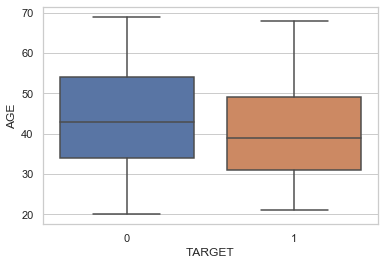

In [161]:
#Age Group w.r.t to Target analysis
sns.boxplot(data = Age_df, x ='TARGET', y = 'AGE')
plt.show()

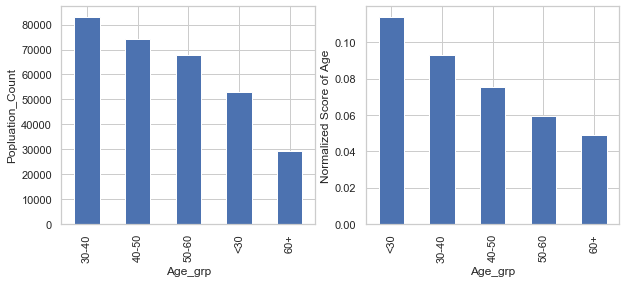

In [159]:
#Comparitive figures of people in different age groups and people having Target 1 in different age groups
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
Age_df.Age_grp.value_counts().plot.bar()
plt.xlabel('Age_grp')
plt.ylabel('Popluation_Count')

plt.subplot(1,2,2)
Age_df.groupby(['Age_grp'])['TARGET'].mean().plot.bar()
plt.xlabel('Age_grp')
plt.ylabel('Normalized Score of Age')
plt.show()

In [38]:
Age_df.Age_grp.value_counts()

30-40    83117
40-50    74401
50-60    67819
<30      52806
60+      29368
Name: Age_grp, dtype: int64

In [39]:
Age_df.groupby(['Age_grp'])['TARGET'].sum()

Age_grp
<30      6019
30-40    7719
40-50    5618
50-60    4024
60+      1445
Name: TARGET, dtype: int64

In [40]:
apps_final['TARGET'].value_counts(normalize = True)*100

0   91.927118
1    8.072882
Name: TARGET, dtype: float64

In [41]:
apps_final_cont =apps_final.loc[:,apps_final.dtypes == float]
collsapp_app=apps_final_cont.columns
collsapp_app

Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3'],
      dtype='object')

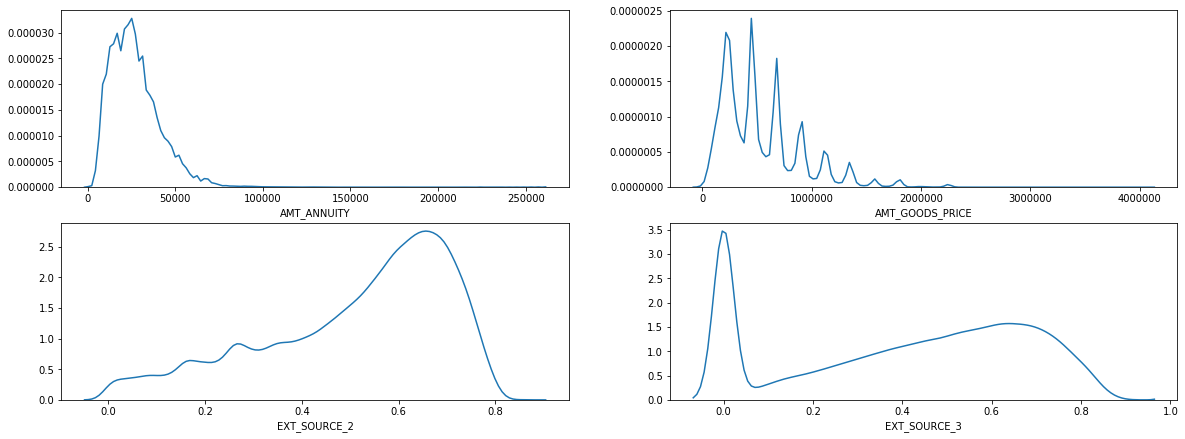

In [42]:
plt.figure(figsize=(20,15))
for coll in range(2,len(collsapp_app)+1):
    plt.subplot(4,2,coll-1)
    sns.distplot(apps_final[collsapp_app[coll-1]].dropna(),apps_final["TARGET"],hist=False)
plt.show()

#### Divide the dataframe into different Target values

In [43]:
Target_1 = apps_final[apps_final['TARGET'] == 1]
Target_1.shape

(24825, 28)

In [44]:
Target_0 = apps_final[apps_final['TARGET'] == 0]
Target_0.shape

(282686, 28)

#### Comparing different categorical columns in terms of the 2 different Target Dataframes

In [45]:
Target_1.NAME_FAMILY_STATUS.value_counts(normalize = True)*100

Married                59.818731
Single / not married   17.953676
Civil marriage         11.927492
Separated               6.525680
Widow                   3.774421
Name: NAME_FAMILY_STATUS, dtype: float64

In [46]:
Target_0.NAME_FAMILY_STATUS.value_counts(normalize = True)*100

Married                64.234522
Single / not married   14.499126
Civil marriage          9.485436
Separated               6.420551
Widow                   5.359657
Unknown                 0.000707
Name: NAME_FAMILY_STATUS, dtype: float64

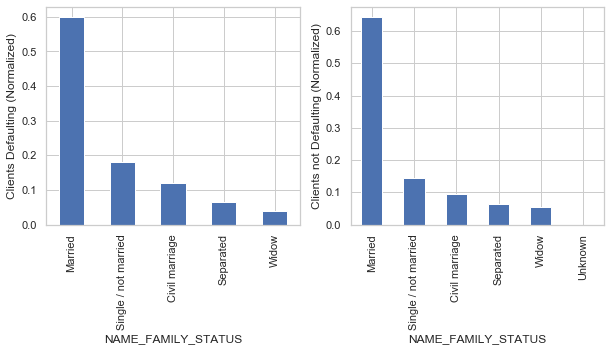

In [172]:
#comparision between target_1 and target_0 for NAME_FAMILY_STATUS
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
Target_1.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar()
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Clients Defaulting (Normalized)')

plt.subplot(1,2,2)
Target_0.NAME_FAMILY_STATUS.value_counts(normalize = True).plot.bar()
plt.xlabel('NAME_FAMILY_STATUS')
plt.ylabel('Clients not Defaulting (Normalized)')
plt.show()

In [48]:
Target_1.CODE_GENDER.value_counts(normalize = True)*100

F   57.079557
M   42.920443
Name: CODE_GENDER, dtype: float64

In [49]:
Target_0.CODE_GENDER.value_counts(normalize = True)*100

F     66.603228
M     33.395357
XNA    0.001415
Name: CODE_GENDER, dtype: float64

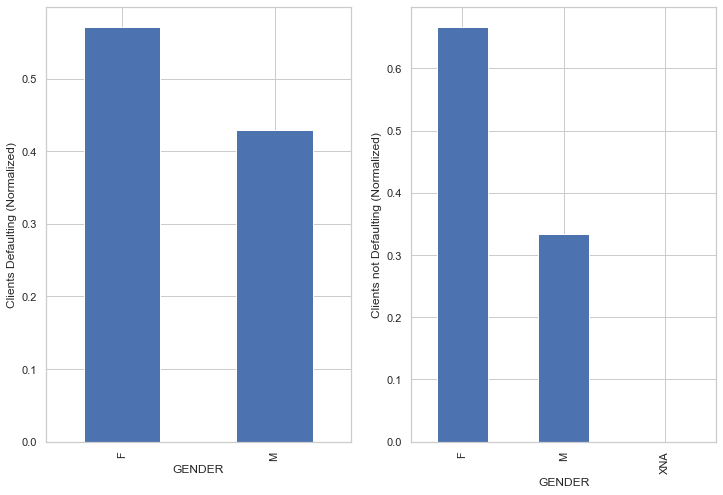

In [167]:
#comparision between target_1 and target_0 for CODE_GENDER
plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
Target_1.CODE_GENDER.value_counts(normalize = True).plot.bar()
plt.xlabel('GENDER')
plt.ylabel('Clients Defaulting (Normalized)')

plt.subplot(1,2,2)
Target_0.CODE_GENDER.value_counts(normalize = True).plot.bar()
plt.xlabel('GENDER')
plt.ylabel('Clients not Defaulting (Normalized)')
plt.show()

In [51]:
Target_1.OCCUPATION_TYPE.value_counts(normalize = True)*100

Others                  25.289023
Laborers                23.516616
Sales staff             12.455186
Drivers                  8.487412
Core staff               7.001007
Managers                 5.349446
Security staff           2.908359
High skill tech staff    2.823766
Cooking staff            2.501511
Medicine staff           2.304129
Accountants              1.909366
Cleaning staff           1.800604
Low-skill Laborers       1.446123
Private service staff    0.704935
Waiters/barmen staff     0.612286
Secretaries              0.370594
Realty agents            0.237664
HR staff                 0.145015
IT staff                 0.136959
Name: OCCUPATION_TYPE, dtype: float64

In [52]:
Target_0.OCCUPATION_TYPE.value_counts(normalize = True)*100

Others                  31.877419
Laborers                17.456825
Sales staff             10.262270
Core staff               9.138054
Managers                 7.090199
Drivers                  5.835450
High skill tech staff    3.777690
Accountants              3.303666
Medicine staff           2.817614
Security staff           2.122143
Cooking staff            1.883716
Cleaning staff           1.487870
Private service staff    0.876237
Low-skill Laborers       0.613401
Secretaries              0.429098
Waiters/barmen staff     0.423084
Realty agents            0.244795
HR staff                 0.186426
IT staff                 0.174045
Name: OCCUPATION_TYPE, dtype: float64

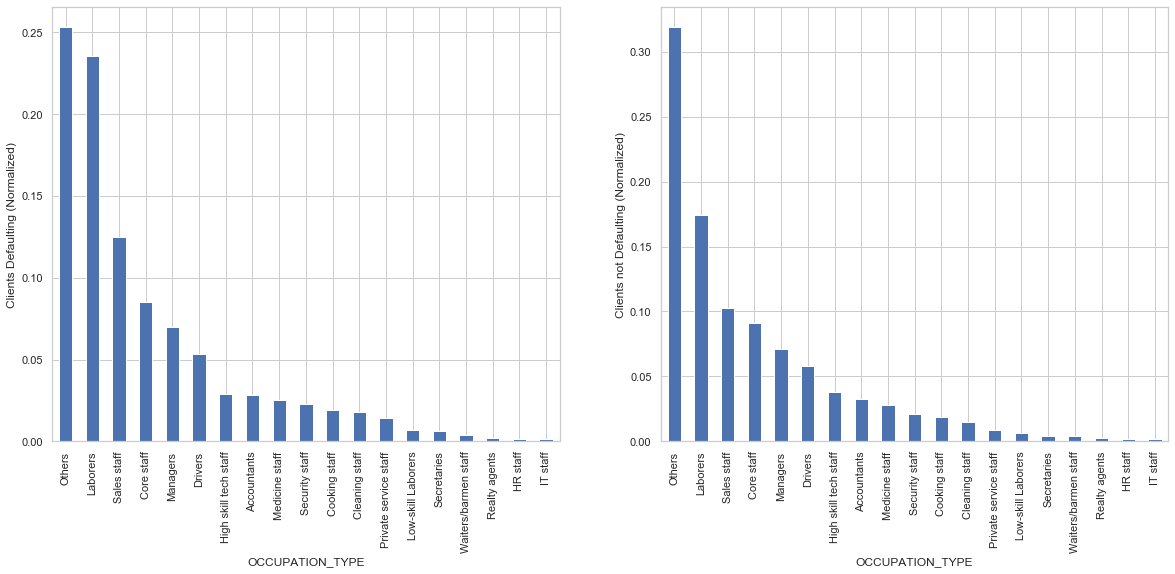

In [168]:
#comparision between target_1 and target_0 for OCCUPATION_TYPE 
plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
Target_1.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar()
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Clients Defaulting (Normalized)')

plt.subplot(1,2,2,sharex=plt.subplot(1,2,1))
Target_0.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar()
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Clients not Defaulting (Normalized)')
plt.show()

In [54]:
Target_0.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100

Cash loans        90.209986
Revolving loans    9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

In [55]:
Target_1.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100

Cash loans        93.538771
Revolving loans    6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64

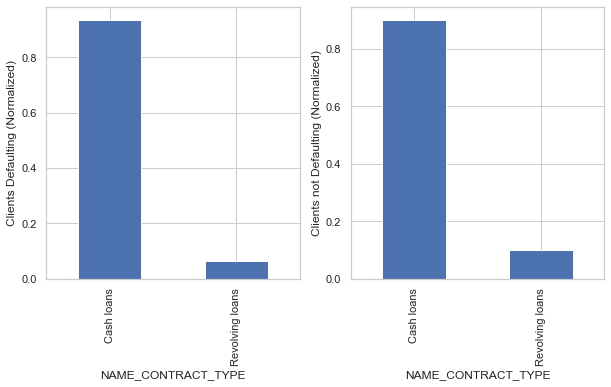

In [169]:
#comparision between target_1 and target_0 for NAME_CONTRACT_TYPE
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
Target_1.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar()
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Clients Defaulting (Normalized)')

plt.subplot(1,2,2)
Target_0.NAME_CONTRACT_TYPE.value_counts(normalize = True).plot.bar()
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Clients not Defaulting (Normalized)')
plt.show()

In [57]:
Target_1.NAME_INCOME_TYPE.value_counts(normalize = True)*100

Working                61.325277
Commercial associate   21.591138
Pensioner              12.012085
State servant           5.031219
Unemployed              0.032226
Maternity leave         0.008056
Name: NAME_INCOME_TYPE, dtype: float64

In [58]:
Target_0.NAME_INCOME_TYPE.value_counts(normalize = True)*100

Working                50.780725
Commercial associate   23.438373
Pensioner              18.529393
State servant           7.235590
Student                 0.006367
Unemployed              0.004952
Businessman             0.003537
Maternity leave         0.001061
Name: NAME_INCOME_TYPE, dtype: float64

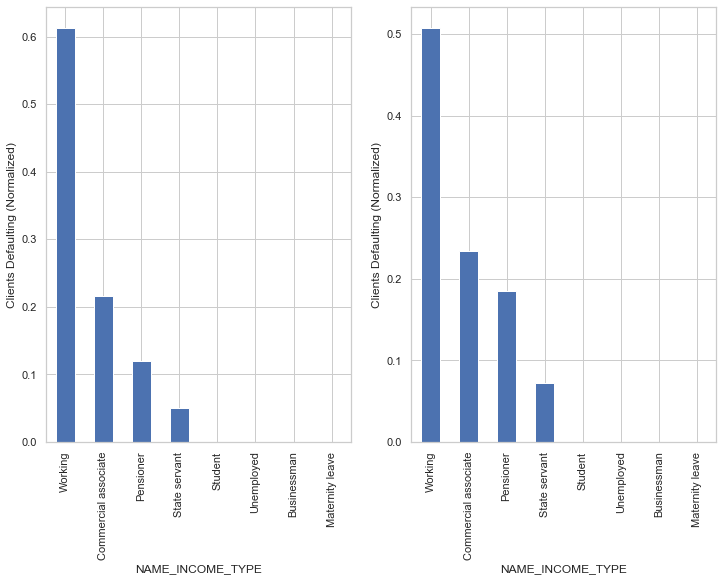

In [170]:
#comparision between target_1 and target_0 for NAME_INCOME_TYPE
plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
Target_1.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Clients Defaulting (Normalized)')

plt.subplot(1,2,2,sharex=plt.subplot(1,2,1))
Target_0.NAME_INCOME_TYPE.value_counts(normalize = True).plot.bar()
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Clients Defaulting (Normalized)')
plt.show()

In [60]:
Target_1.NAME_HOUSING_TYPE.value_counts(normalize = True)*100

House / apartment     85.687815
With parents           6.992951
Municipal apartment    3.846928
Rented apartment       2.420947
Office apartment       0.692850
Co-op apartment        0.358510
Name: NAME_HOUSING_TYPE, dtype: float64

In [61]:
Target_0.NAME_HOUSING_TYPE.value_counts(normalize = True)*100

House / apartment     89.001931
With parents           4.635532
Municipal apartment    3.618149
Rented apartment       1.514047
Office apartment       0.864917
Co-op apartment        0.365423
Name: NAME_HOUSING_TYPE, dtype: float64

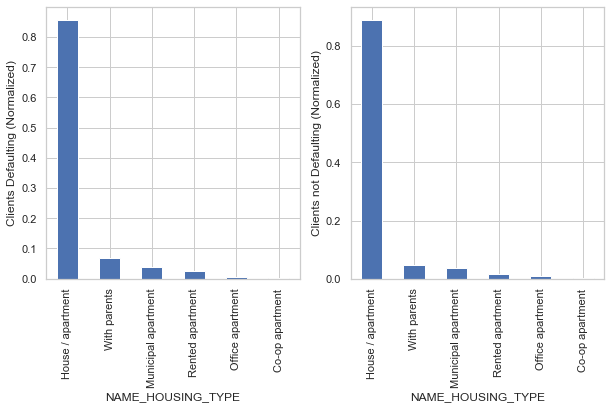

In [171]:
#comparision between target_1 and target_0 for NAME_HOUSING_TYPE
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
Target_1.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.bar()
plt.xlabel('NAME_HOUSING_TYPE')
plt.ylabel('Clients Defaulting (Normalized)')

plt.subplot(1,2,2)
Target_0.NAME_HOUSING_TYPE.value_counts(normalize = True).plot.bar()
plt.xlabel('NAME_HOUSING_TYPE')
plt.ylabel('Clients not Defaulting (Normalized)')
plt.show()

## Finding Correlation

In [63]:
Target_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 28 columns):
SK_ID_CURR                    282686 non-null int64
TARGET                        282686 non-null int64
NAME_CONTRACT_TYPE            282686 non-null object
CODE_GENDER                   282686 non-null object
AMT_INCOME_TOTAL              282686 non-null float64
AMT_ANNUITY                   282674 non-null float64
AMT_GOODS_PRICE               282686 non-null float64
NAME_INCOME_TYPE              282686 non-null object
NAME_EDUCATION_TYPE           282686 non-null object
NAME_FAMILY_STATUS            282686 non-null object
NAME_HOUSING_TYPE             282686 non-null object
DAYS_BIRTH                    282686 non-null int64
DAYS_EMPLOYED                 282686 non-null int64
DAYS_ID_PUBLISH               282686 non-null int64
FLAG_MOBIL                    282686 non-null int64
FLAG_PHONE                    282686 non-null int64
FLAG_EMAIL                    282686 non-null

In [64]:
Target_0.nunique().sort_values()

TARGET                             1
REG_REGION_NOT_WORK_REGION         2
NAME_CONTRACT_TYPE                 2
FLAG_EMAIL                         2
FLAG_PHONE                         2
FLAG_MOBIL                         2
REG_REGION_NOT_LIVE_REGION         2
CODE_GENDER                        3
REGION_RATING_CLIENT               3
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_INCOME_TYPE                   8
CNT_FAM_MEMBERS                   16
OCCUPATION_TYPE                   19
YEARS_PUBLISH                     19
AGE                               50
YEARS_EMPLOYED                    51
EXT_SOURCE_3                     792
AMT_GOODS_PRICE                  949
AMT_INCOME_TOTAL                2450
DAYS_LAST_PHONE_CHANGE          3765
DAYS_ID_PUBLISH                 6164
DAYS_EMPLOYED                  12494
AMT_ANNUITY                    13522
DAYS_BIRTH                     17451
EXT_SOURCE_2                  113035
S

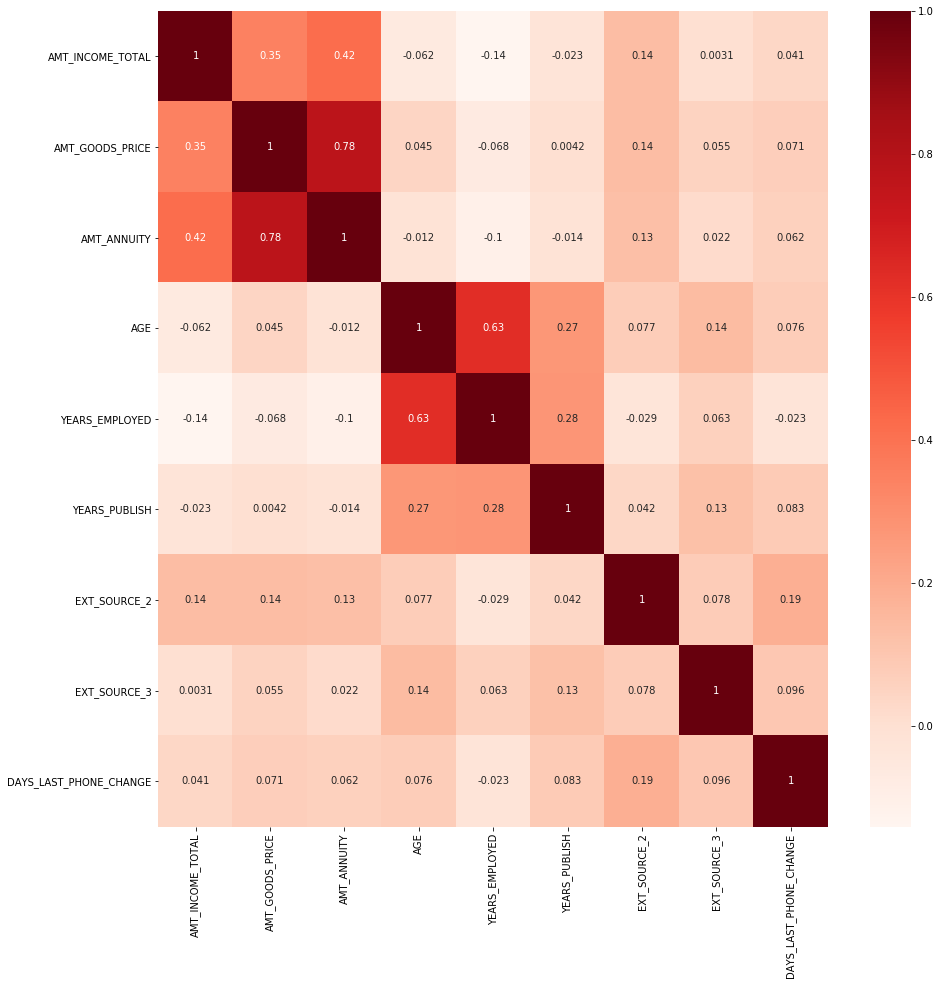

In [65]:
#Find correlation of Variables with Target 0
plt.figure(figsize=[15,15])
ax=sns.heatmap(Target_0[["AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AMT_ANNUITY","AGE","YEARS_EMPLOYED","YEARS_PUBLISH","EXT_SOURCE_2","EXT_SOURCE_3","DAYS_LAST_PHONE_CHANGE"]].corr(), annot = True, cmap = "Reds")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

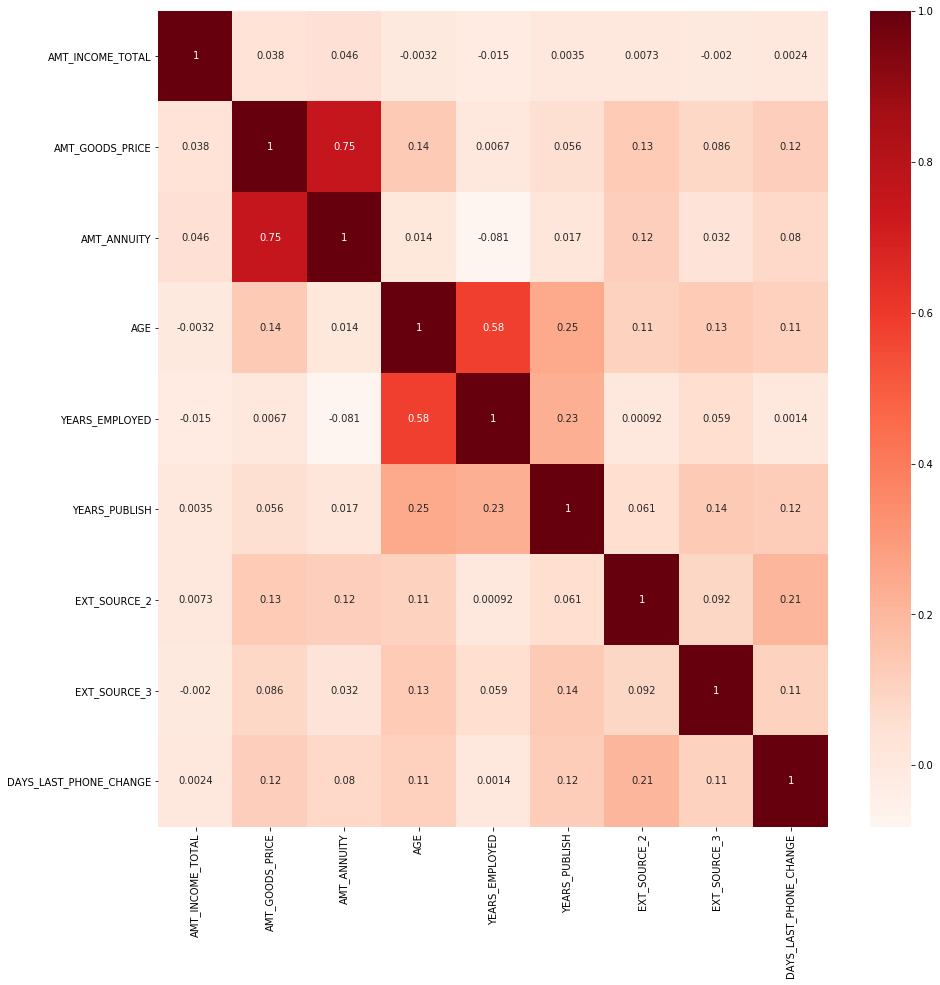

In [66]:
#Find correlation of Variables with Target 1
plt.figure(figsize=[15,15])
ax=sns.heatmap(Target_1[["AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AMT_ANNUITY","AGE","YEARS_EMPLOYED","YEARS_PUBLISH","EXT_SOURCE_2","EXT_SOURCE_3","DAYS_LAST_PHONE_CHANGE"]].corr(), annot = True, cmap = "Reds")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [67]:
#Drop repetitive columnms
Target_1.drop(columns=["DAYS_BIRTH","DAYS_ID_PUBLISH","DAYS_EMPLOYED","REG_REGION_NOT_WORK_REGION","REG_REGION_NOT_LIVE_REGION"], axis=1, inplace=True)

In [68]:
#Find top correlations
corr_mat = Target_1.corr()

corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))

corr_mat_df = corr_mat.unstack().reset_index()
corr_mat_df.columns = ['VAR1','VAR2','Correlation']
corr_mat_df.head()

corr_mat_df.dropna(subset=['Correlation'],inplace=True)


corr_mat_df['Correlation']= round(corr_mat_df['Correlation'],2)
#Since we see correlation as absolute value,we convert into absolute value
#corr_mat_df['Correlation']= corr_mat_df['Correlation'].abs()
corr_mat_df_final = corr_mat_df.sort_values(by='Correlation',ascending=False)
corr_mat_df_final[corr_mat_df.Correlation>0]

,VAR1,VAR2,Correlation
67,AMT_GOODS_PRICE,AMT_ANNUITY,0.750000
237,YEARS_EMPLOYED,AGE,0.580000
253,YEARS_PUBLISH,AGE,0.250000
254,YEARS_PUBLISH,YEARS_EMPLOYED,0.230000
202,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.210000
251,YEARS_PUBLISH,EXT_SOURCE_3,0.140000
212,AGE,AMT_GOODS_PRICE,0.140000
164,EXT_SOURCE_2,AMT_GOODS_PRICE,0.130000
219,AGE,EXT_SOURCE_3,0.130000
163,EXT_SOURCE_2,AMT_ANNUITY,0.120000


In [69]:
#Drop repetitive columnms
Target_0.drop(columns=["DAYS_BIRTH","DAYS_ID_PUBLISH","DAYS_EMPLOYED","REG_REGION_NOT_WORK_REGION","REG_REGION_NOT_LIVE_REGION"], axis=1, inplace=True)

In [70]:
#Find top correlations
corr_mat_0 = Target_0.corr()

corr_mat_0 = corr_mat_0.where(np.triu(np.ones(corr_mat_0.shape),k=1).astype(np.bool))

corr_mat_df_0 = corr_mat_0.unstack().reset_index()
corr_mat_df_0.columns = ['VAR1','VAR2','Correlation']

corr_mat_df_0.dropna(subset=['Correlation'],inplace=True)


corr_mat_df_0['Correlation']= round(corr_mat_df_0['Correlation'],2)
#Since we see correlation as absolute value,we convert into absolute value
#corr_mat_df_0['Correlation']= corr_mat_df_0['Correlation'].abs()
corr_mat_df_final_0 = corr_mat_df_0.sort_values(by='Correlation',ascending=False)
corr_mat_df_final_0[corr_mat_df_0.Correlation>0]

,VAR1,VAR2,Correlation
67,AMT_GOODS_PRICE,AMT_ANNUITY,0.780000
237,YEARS_EMPLOYED,AGE,0.630000
50,AMT_ANNUITY,AMT_INCOME_TOTAL,0.420000
66,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.350000
254,YEARS_PUBLISH,YEARS_EMPLOYED,0.280000
253,YEARS_PUBLISH,AGE,0.270000
202,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.190000
164,EXT_SOURCE_2,AMT_GOODS_PRICE,0.140000
162,EXT_SOURCE_2,AMT_INCOME_TOTAL,0.140000
219,AGE,EXT_SOURCE_3,0.140000


###### We have considered the following variable based on correlation matrix:

Variable 1:Age

Variable 2:Years Employed

Variable 3:Years Publish

Variable 4:Amount Goods Price

Vaeiable 5:Amount Annuity

### Analysis OF Continuous variables

In [71]:
#Check continuous variables
apps_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
AMT_INCOME_TOTAL              307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307511 non-null float64
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non-null int64
DAYS_ID_PUBLISH               307511 non-null int64
FLAG_MOBIL                    307511 non-null int64
FLAG_PHONE                    307511 non-null int64
FLAG_EMAIL                    307511 non-null

In [72]:
#create a separate dataframe with numerical varibles for finding outliers
Numerical_df = apps_final[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3']].copy()
Numerical_df.reset_index(drop=True)
Numerical_df.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3
0,202500.000000,24700.500000,351000.000000,0.262949,0.139376
1,270000.000000,35698.500000,1129500.000000,0.622246,0.000000
2,67500.000000,6750.000000,135000.000000,0.555912,0.729567
3,135000.000000,29686.500000,297000.000000,0.650442,0.000000
4,121500.000000,21865.500000,513000.000000,0.322738,0.000000


#### Check outliers

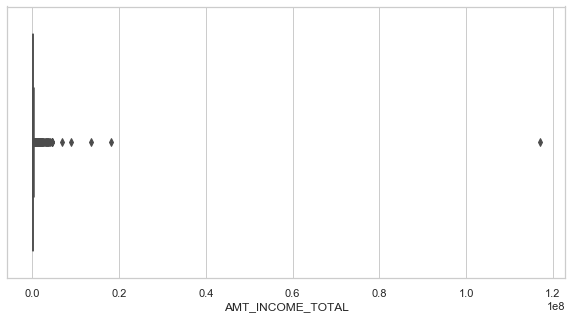

In [73]:
#Plot a box plot of AMT_INCOME_TOTAL to check distribution of values
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.boxplot(Numerical_df.AMT_INCOME_TOTAL)
plt.show()

From the above graph we can observe that there are quite a large number of outliers.

In [74]:
#Check quartile range,mean,median,etc for AMT_INCOME_TOTAL
Numerical_df.AMT_INCOME_TOTAL.describe(percentiles=[0.5, 0.7, 0.9, 0.95, 0.99])

count      307511.000000
mean       168797.919297
std        237123.146279
min         25650.000000
50%        147150.000000
70%        180000.000000
90%        270000.000000
95%        337500.000000
99%        472500.000000
max     117000000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

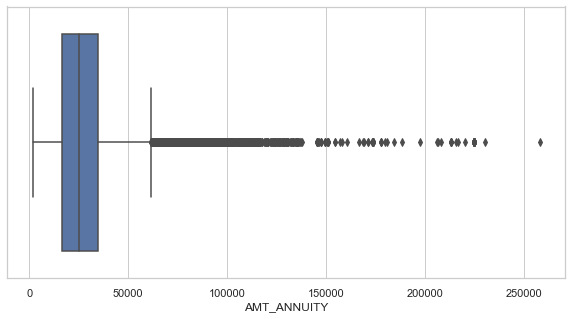

In [75]:
#Plot a box plot of AMT_ANNUITY to check distribution of values
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x=Numerical_df["AMT_ANNUITY"])

From the above graph we can observe that there are quite a large number of outliers.

In [76]:
#Check quartile range,mean,median,etc for AMT_ANNUITY
Numerical_df.AMT_ANNUITY.describe(percentiles=[0.5, 0.7, 0.9, 0.95, 0.99])

count   307499.000000
mean     27108.573909
std      14493.737315
min       1615.500000
50%      24903.000000
70%      32004.000000
90%      45954.000000
95%      53325.000000
99%      70006.500000
max     258025.500000
Name: AMT_ANNUITY, dtype: float64

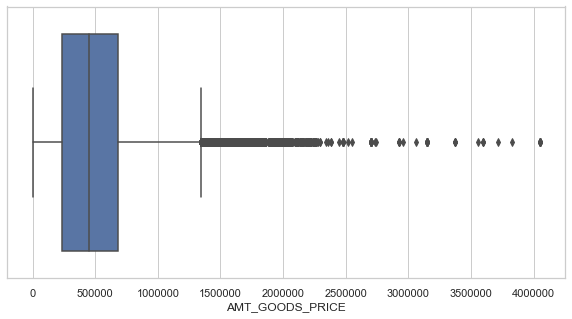

In [77]:
#Plot a box plot of AMT_GOODS_PRICE to check distribution of values
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x=Numerical_df["AMT_GOODS_PRICE"])

From the above graph we can observe that there are quite a large number of outliers.

In [78]:
#Check quartile range,mean,median,etc for AMT_GOODS_PRICE
Numerical_df.AMT_GOODS_PRICE.describe(percentiles=[0.5, 0.7, 0.9, 0.95, 0.99])

count    307511.000000
mean     537909.479651
std      369633.752648
min           0.000000
50%      450000.000000
70%      675000.000000
90%     1093500.000000
95%     1305000.000000
99%     1800000.000000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

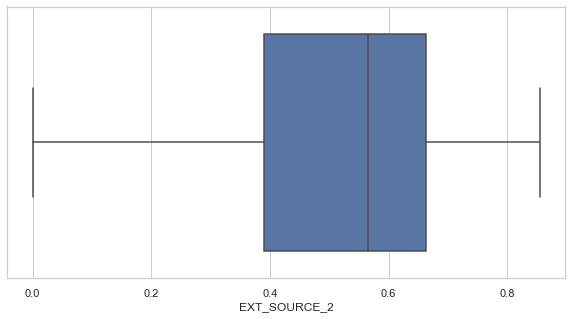

In [79]:
#Plot a box plot of EXT_SOURCE_2 to check distribution of values
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x=Numerical_df["EXT_SOURCE_2"])

From the above graph we can observe that there are no outliers.

In [80]:
#Check quartile range,mean,median,etc for EXT_SOURCE_2
Numerical_df.EXT_SOURCE_2.describe(percentiles=[0.5, 0.7, 0.9, 0.95, 0.99])

count   307511.000000
mean         0.513289
std          0.192334
min          0.000000
50%          0.565467
70%          0.645659
90%          0.721950
95%          0.747681
99%          0.782766
max          0.855000
Name: EXT_SOURCE_2, dtype: float64

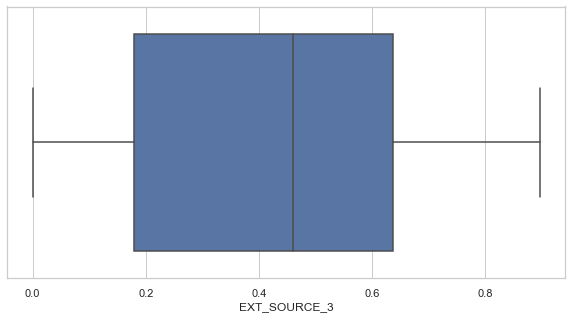

In [81]:
#Plot a box plot of EXT_SOURCE_3 to check distribution of values
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.boxplot(x=Numerical_df["EXT_SOURCE_3"])

From the above graph we can observe that there are no outliers.

In [82]:
#Check quartile range,mean,median,etc for EXT_SOURCE_3
Numerical_df.EXT_SOURCE_3.describe(percentiles=[0.5, 0.7, 0.9, 0.95, 0.99])

count   307511.000000
mean         0.409575
std          0.268177
min          0.000000
50%          0.459690
70%          0.604113
90%          0.735221
95%          0.777659
99%          0.832785
max          0.896010
Name: EXT_SOURCE_3, dtype: float64

##### Treatment of outliers through InterQuantile Range

In [83]:
#IQR VALUES OF ALL CONTINUOUS VARIABLES:-
Q1 = Numerical_df.quantile(0.25)
Q3 = Numerical_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AMT_INCOME_TOTAL    90000.000000
AMT_ANNUITY         18072.000000
AMT_GOODS_PRICE    441000.000000
EXT_SOURCE_2            0.272639
EXT_SOURCE_3            0.457616
dtype: float64


In [84]:
#Treating the outliers in all continuous varibales
Numerical_df_out = Numerical_df[~((Numerical_df < (Q1 - 1.5 * IQR)) |(Numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]
Numerical_df_out.shape

(279056, 5)

In [85]:
#Compare mean and median of columns
print(Numerical_df_out.mean())
print(Numerical_df_out.median())

AMT_INCOME_TOTAL   151033.662675
AMT_ANNUITY         24716.498952
AMT_GOODS_PRICE    473995.364033
EXT_SOURCE_2            0.506162
EXT_SOURCE_3            0.407418
dtype: float64
AMT_INCOME_TOTAL   135000.000000
AMT_ANNUITY         23710.500000
AMT_GOODS_PRICE    450000.000000
EXT_SOURCE_2            0.557655
EXT_SOURCE_3            0.457900
dtype: float64


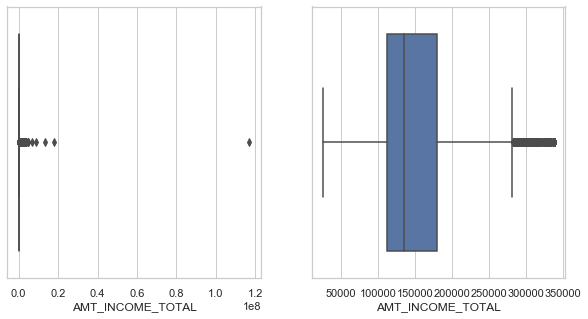

In [86]:
#Check if outliers have been removed for AMT_INCOME_TOTAL
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
plt.subplot(121)
sns.boxplot(Numerical_df.AMT_INCOME_TOTAL)
plt.subplot(122)
sns.boxplot(Numerical_df_out.AMT_INCOME_TOTAL)
plt.show()

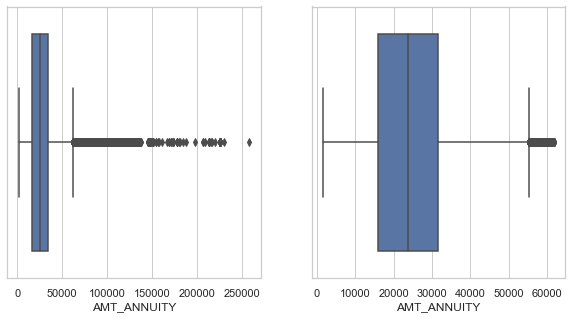

In [87]:
#Check if outliers have been removed for AMT_ANNUITY
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
plt.subplot(121)
sns.boxplot(Numerical_df.AMT_ANNUITY)
plt.subplot(122)
sns.boxplot(Numerical_df_out.AMT_ANNUITY)
plt.show()

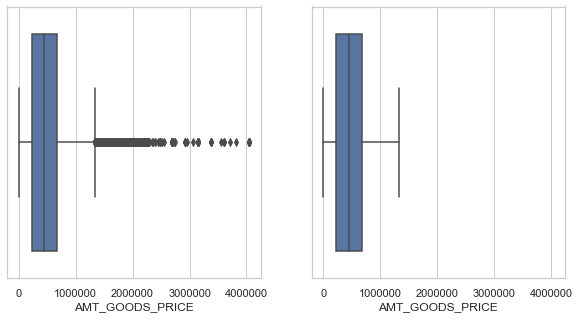

In [88]:
#Check if outliers have been removed for AMT_GOODS_PRICE
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
plt.subplot(121)
sns.boxplot(Numerical_df.AMT_GOODS_PRICE)
plt.subplot(122,sharex=plt.subplot(121))
sns.boxplot(Numerical_df_out.AMT_GOODS_PRICE)
plt.show()

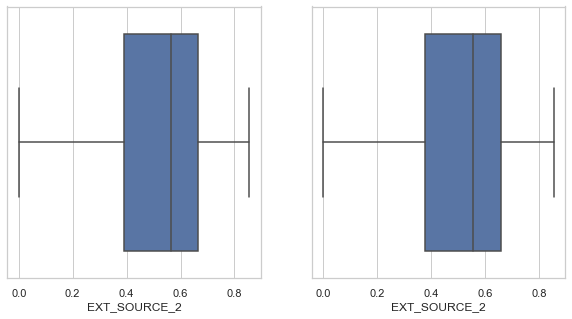

In [89]:
#Check if outliers have been removed for EXT_SOURCE_2
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
plt.subplot(121)
sns.boxplot(Numerical_df.EXT_SOURCE_2)
plt.subplot(122,sharex=plt.subplot(121))
sns.boxplot(Numerical_df_out.EXT_SOURCE_2)
plt.show()

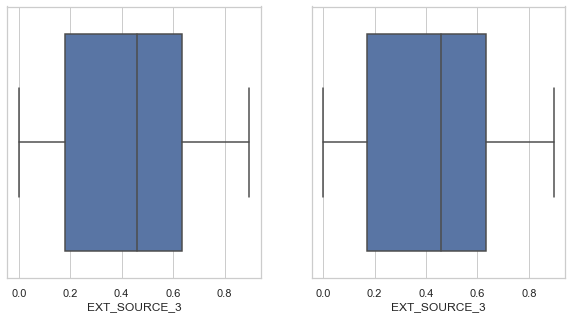

In [90]:
#Check if outliers have been removed for EXT_SOURCE_3
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
plt.subplot(121)
sns.boxplot(Numerical_df.EXT_SOURCE_3)
plt.subplot(122)
sns.boxplot(Numerical_df_out.EXT_SOURCE_3)
plt.show()

### Analysis w.r.t Target Variable

In [91]:
# Look at distribution of the application data w.r.t Target
apps_final['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### Univariate Analysis for Continuous Variables

In [92]:
#Check columns
print(Target_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 23 columns):
SK_ID_CURR                24825 non-null int64
TARGET                    24825 non-null int64
NAME_CONTRACT_TYPE        24825 non-null object
CODE_GENDER               24825 non-null object
AMT_INCOME_TOTAL          24825 non-null float64
AMT_ANNUITY               24825 non-null float64
AMT_GOODS_PRICE           24825 non-null float64
NAME_INCOME_TYPE          24825 non-null object
NAME_EDUCATION_TYPE       24825 non-null object
NAME_FAMILY_STATUS        24825 non-null object
NAME_HOUSING_TYPE         24825 non-null object
FLAG_MOBIL                24825 non-null int64
FLAG_PHONE                24825 non-null int64
FLAG_EMAIL                24825 non-null int64
OCCUPATION_TYPE           24825 non-null object
CNT_FAM_MEMBERS           24825 non-null int32
REGION_RATING_CLIENT      24825 non-null int64
EXT_SOURCE_2              24825 non-null float64
EXT_SOURCE_3              248

Analysis of AMT_GOODS_PRICE w.r.t Target

In [93]:
Target_1.AMT_GOODS_PRICE.describe()

count     24825.000000
mean     488558.780302
std      311828.863464
min           0.000000
25%      238500.000000
50%      450000.000000
75%      675000.000000
max     3600000.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [94]:
Target_0.AMT_GOODS_PRICE.describe()

count    282686.000000
mean     542243.373482
std      373973.434559
min           0.000000
25%      238500.000000
50%      450000.000000
75%      685002.375000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

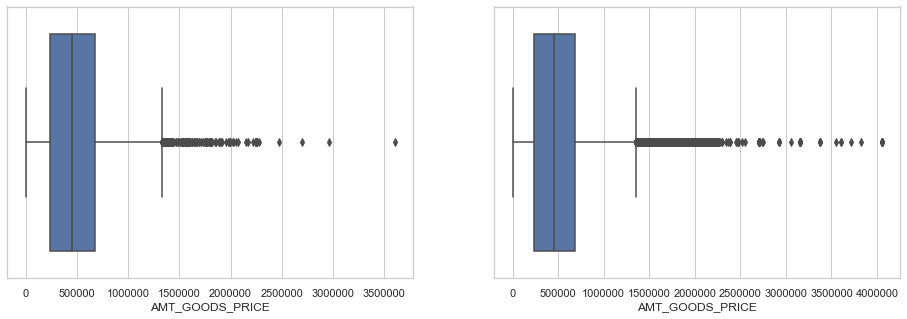

In [95]:
#Comparitive graph of AMT_GOODS_PRICE w.r.t Target Dataframes
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.set(style="whitegrid")
sns.boxplot(Target_1.AMT_GOODS_PRICE)
plt.subplot(122)
sns.boxplot(Target_0.AMT_GOODS_PRICE)
plt.show()

Analysis of AMT_ANNUITY w.r.t Target

In [96]:
Target_1.AMT_ANNUITY.describe()

count    24825.000000
mean     26481.744290
std      12450.676999
min       2722.500000
25%      17361.000000
50%      25263.000000
75%      32976.000000
max     149211.000000
Name: AMT_ANNUITY, dtype: float64

In [97]:
Target_0.AMT_ANNUITY.describe()

count   282674.000000
mean     27163.623349
std      14658.307178
min       1615.500000
25%      16456.500000
50%      24876.000000
75%      34749.000000
max     258025.500000
Name: AMT_ANNUITY, dtype: float64

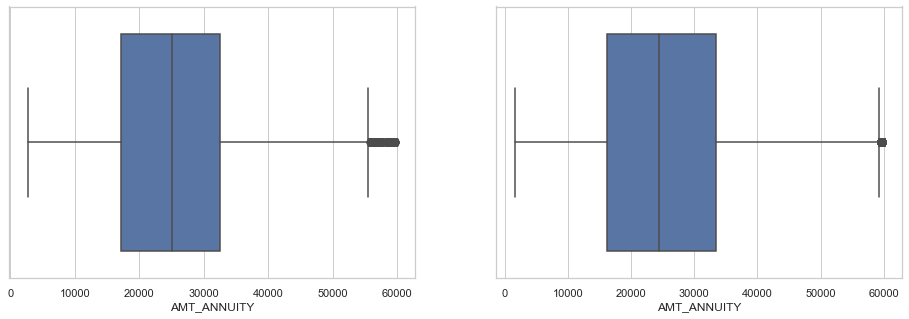

In [98]:
Target_1_AMT_ANNUITY = Target_1[~((Target_1["AMT_ANNUITY"] >60000))]
Target_0_AMT_ANNUITY = Target_0[~((Target_0["AMT_ANNUITY"] >60000))]
#Comparitive graph of AMT_ANNUITY w.r.t Target Dataframes
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.set(style="whitegrid")
sns.boxplot(Target_1_AMT_ANNUITY.AMT_ANNUITY)
plt.subplot(122)
sns.boxplot(Target_0_AMT_ANNUITY.AMT_ANNUITY)
plt.show()

Analysis of YEARS_EMPLOYED w.r.t Target

In [99]:
Target_1.YEARS_EMPLOYED.describe()

count   24825.000000
mean      124.382880
std       324.062529
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max      1000.000000
Name: YEARS_EMPLOYED, dtype: float64

In [100]:
Target_0.YEARS_EMPLOYED.describe()

count   282686.000000
mean       190.346703
std        386.189625
min          0.000000
25%          2.000000
50%          6.000000
75%         16.000000
max       1000.000000
Name: YEARS_EMPLOYED, dtype: float64

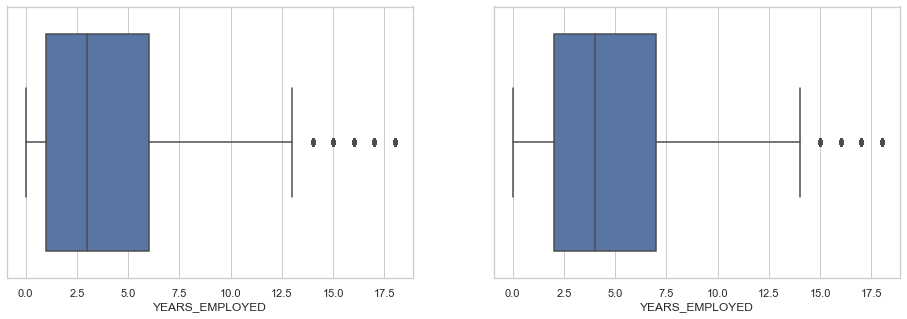

In [101]:
Target_1_YEARS_EMPLOYED = Target_1[~((Target_1["YEARS_EMPLOYED"] >18))]
Target_0_YEARS_EMPLOYED = Target_0[~((Target_0["YEARS_EMPLOYED"] >18))]
#Comparitive graph of YEARS_EMPLOYED w.r.t Target Dataframes
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.set(style="whitegrid")
sns.boxplot(Target_1_YEARS_EMPLOYED.YEARS_EMPLOYED)
plt.subplot(122)
sns.boxplot(Target_0_YEARS_EMPLOYED.YEARS_EMPLOYED)
plt.show()

Analysis of AGE w.r.t Target

In [102]:
Target_1.AGE.describe()

count   24825.000000
mean       40.279960
std        11.484458
min        21.000000
25%        31.000000
50%        39.000000
75%        49.000000
max        68.000000
Name: AGE, dtype: float64

In [103]:
Target_0.AGE.describe()

count   282686.000000
mean        43.713123
std         11.955290
min         20.000000
25%         34.000000
50%         43.000000
75%         54.000000
max         69.000000
Name: AGE, dtype: float64

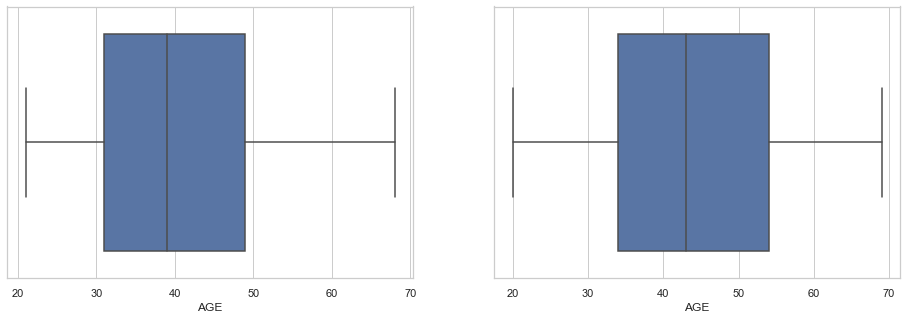

In [104]:
#Comparitive graph of AGE w.r.t Target Dataframes
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.set(style="whitegrid")
sns.boxplot(Target_1.AGE)
plt.subplot(122)
sns.boxplot(Target_0.AGE)
plt.show()

Analysis of AMT_INCOME_TOTAL w.r.t Target

In [105]:
Target_1.AMT_INCOME_TOTAL.describe()

count       24825.000000
mean       165611.760906
std        746676.959440
min         25650.000000
25%        112500.000000
50%        135000.000000
75%        202500.000000
max     117000000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [106]:
Target_0.AMT_INCOME_TOTAL.describe()

count     282686.000000
mean      169077.722266
std       110476.268524
min        25650.000000
25%       112500.000000
50%       148500.000000
75%       202500.000000
max     18000090.000000
Name: AMT_INCOME_TOTAL, dtype: float64

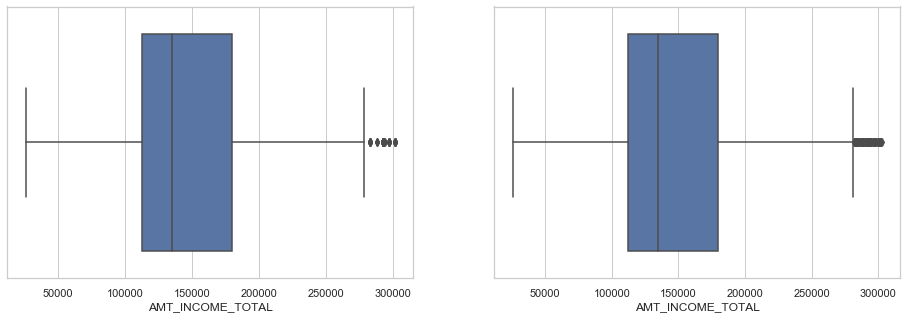

In [107]:
Target_1_AMT_INCOME_TOTAL = Target_1[~((Target_1["AMT_INCOME_TOTAL"] >302500))]
Target_0_AMT_INCOME_TOTAL = Target_0[~((Target_0["AMT_INCOME_TOTAL"] >302500))]
#Comparitive graph of AMT_INCOME_TOTAL w.r.t Target Dataframes
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.set(style="whitegrid")
sns.boxplot(Target_1_AMT_INCOME_TOTAL.AMT_INCOME_TOTAL)
plt.subplot(122)
sns.boxplot(Target_0_AMT_INCOME_TOTAL.AMT_INCOME_TOTAL)
plt.show()

Analysis of EXT_SOURCE_2 w.r.t Target

In [108]:
Target_1.EXT_SOURCE_2.describe()

count   24825.000000
mean        0.410074
std         0.213711
min         0.000000
25%         0.236789
50%         0.439492
75%         0.593937
max         0.811870
Name: EXT_SOURCE_2, dtype: float64

In [109]:
Target_0.EXT_SOURCE_2.describe()

count   282686.000000
mean         0.522353
std          0.187650
min          0.000000
25%          0.408242
50%          0.573402
75%          0.667521
max          0.855000
Name: EXT_SOURCE_2, dtype: float64

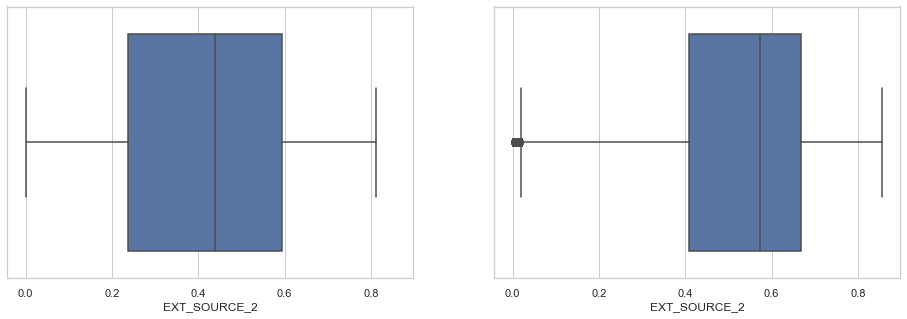

In [110]:
#Comparitive graph of EXT_SOURCE_2 w.r.t Target Dataframes
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.set(style="whitegrid")
sns.boxplot(Target_1.EXT_SOURCE_2)
plt.subplot(122,sharex=plt.subplot(121))
sns.boxplot(Target_0.EXT_SOURCE_2)
plt.show()

Analysis of EXT_SOURCE_3 w.r.t Target

In [111]:
Target_1.EXT_SOURCE_3.describe()

count   24825.000000
mean        0.301367
std         0.244129
min         0.000000
25%         0.055711
50%         0.288130
75%         0.495666
max         0.896010
Name: EXT_SOURCE_3, dtype: float64

In [112]:
Target_0.EXT_SOURCE_3.describe()

count   282686.000000
mean         0.419077
std          0.268109
min          0.000000
25%          0.199771
50%          0.474051
75%          0.643026
max          0.893976
Name: EXT_SOURCE_3, dtype: float64

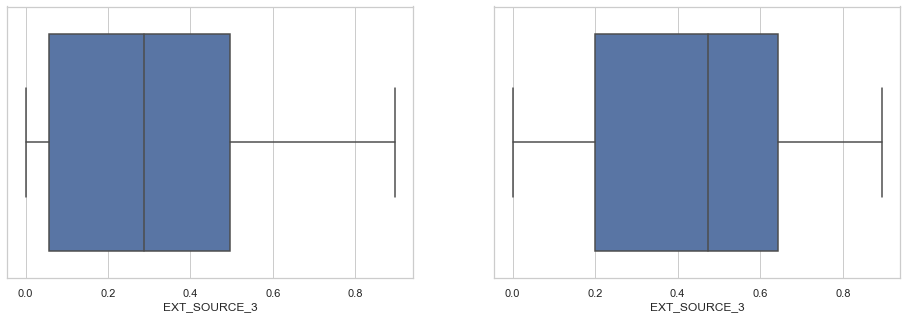

In [113]:
#Comparitive graph of EXT_SOURCE_2 w.r.t Target Dataframes
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.set(style="whitegrid")
sns.boxplot(Target_1.EXT_SOURCE_3)
plt.subplot(122)
sns.boxplot(Target_0.EXT_SOURCE_3)
plt.show()

In [114]:
Target_1.YEARS_PUBLISH.describe()

count   24825.000000
mean        7.000201
std         4.152774
min         0.000000
25%         3.000000
50%         7.000000
75%        11.000000
max        17.000000
Name: YEARS_PUBLISH, dtype: float64

In [115]:
Target_0.YEARS_PUBLISH.describe()

count   282686.000000
mean         7.776112
std          4.127031
min          0.000000
25%          4.000000
50%          9.000000
75%         11.000000
max         19.000000
Name: YEARS_PUBLISH, dtype: float64

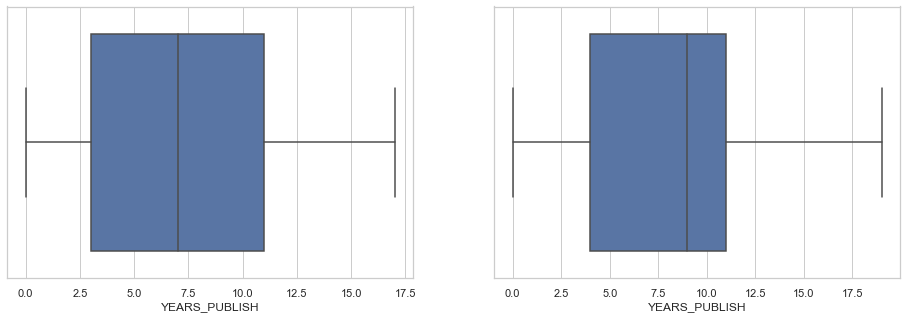

In [116]:

#Comparitive graph of YEARS_PUBLISH w.r.t Target Dataframes
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.set(style="whitegrid")
sns.boxplot(Target_1.YEARS_PUBLISH)
plt.subplot(122)
sns.boxplot(Target_0.YEARS_PUBLISH)
plt.show()

### Bivariate analysis of numerical variables

<Figure size 1440x1440 with 0 Axes>

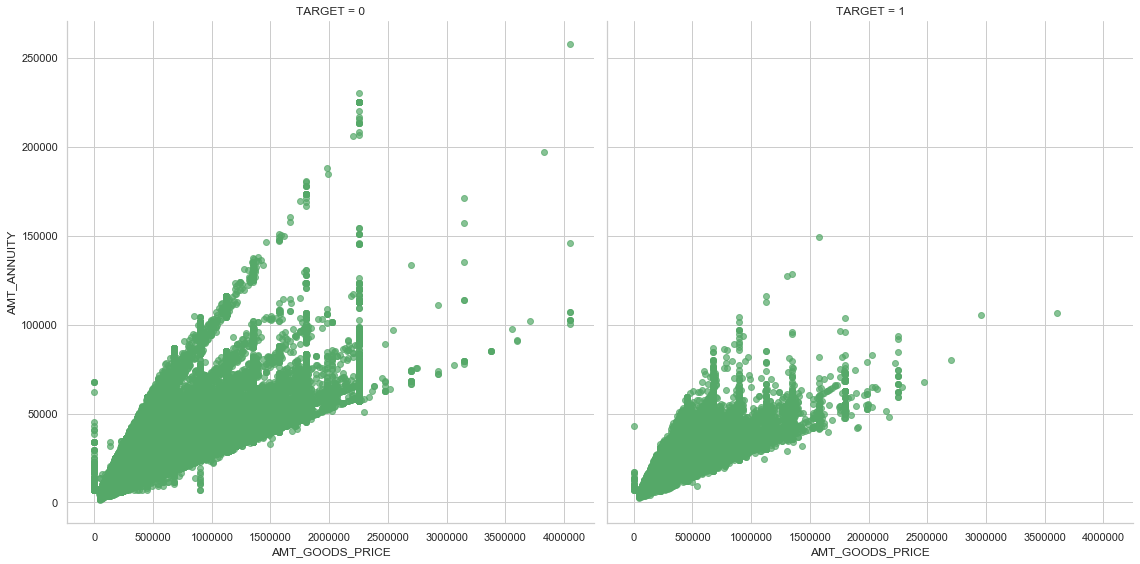

In [179]:
#Bivariate Analysis of AMT_GOODS_PRICE and AMT_ANNUITY w.r.t Target
plt.figure(figsize=(20,20))
g = sns.FacetGrid(apps_final, col="TARGET",height=8, aspect=1)
g.map(plt.scatter, "AMT_GOODS_PRICE", "AMT_ANNUITY", alpha=.7,color="g")
plt.show()


In [118]:
Target_1['AMT_GOODS_PRICE'].describe()

count     24825.000000
mean     488558.780302
std      311828.863464
min           0.000000
25%      238500.000000
50%      450000.000000
75%      675000.000000
max     3600000.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [119]:
Target_0['AMT_GOODS_PRICE'].describe()

count    282686.000000
mean     542243.373482
std      373973.434559
min           0.000000
25%      238500.000000
50%      450000.000000
75%      685002.375000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [120]:
#Create range of different AMT_GOODS_PRICE for Target_1
Target_1['AMT_GOODS_PRICE_GRP'] = pd.cut(Target_1.AMT_GOODS_PRICE[:], [0, 100000, 300000,500000,700000,4100000], labels=["<100000","100000-300000","300000-500000","500000-700000","700000+"])

In [121]:
#Create range of different AMT_GOODS_PRICE for Target_0
Target_0['AMT_GOODS_PRICE_GRP'] = pd.cut(Target_0.AMT_GOODS_PRICE[:], [0, 100000, 300000,500000,700000,4100000], labels=["<100000","100000-300000","300000-500000","500000-700000","700000+"])

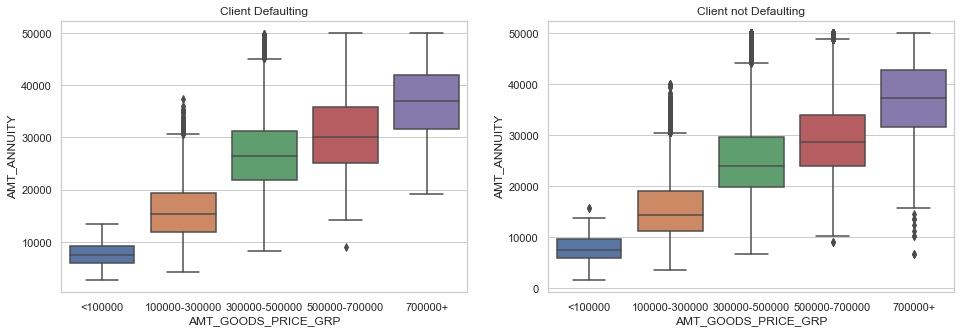

In [175]:
# Bivariate Analysis of AMT_GOODS_PRICE and AMT_ANNUITY w.r.t Target
Target_1_analysis = Target_1[~((Target_1["AMT_ANNUITY"] >50000))]
Target_0_analysis = Target_0[~((Target_0["AMT_ANNUITY"] >50000))]
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.set(style="whitegrid")
plt.title('Clients Defaulting')
sns.boxplot("AMT_GOODS_PRICE_GRP","AMT_ANNUITY",data=Target_1_analysis)
plt.subplot(122)
plt.title('Clients not Defaulting')
sns.boxplot("AMT_GOODS_PRICE_GRP","AMT_ANNUITY",data=Target_0_analysis)
plt.show()

<Figure size 1080x1440 with 0 Axes>

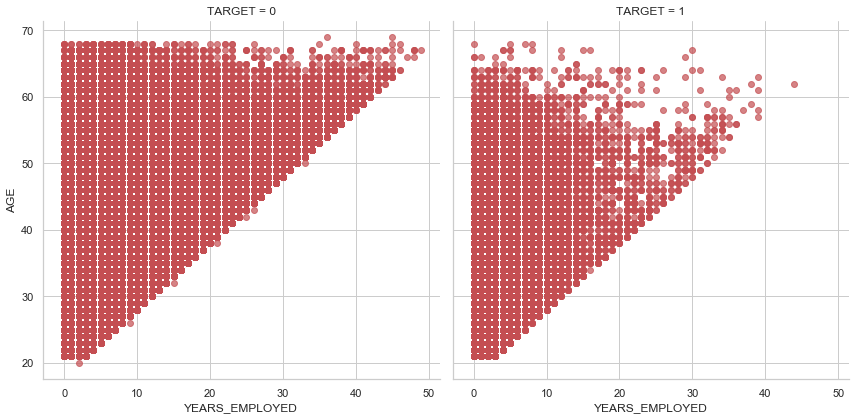

In [123]:
#Bivariate Analysis of YEARS_EMPLOYED and AGE w.r.t Target
apps_final_analysis_2 = apps_final[~((apps_final["YEARS_EMPLOYED"] >500))]
plt.figure(figsize=(15,20))
g = sns.FacetGrid(apps_final_analysis_2, col="TARGET",height=6, aspect=1)
g.map(plt.scatter, "YEARS_EMPLOYED", "AGE", alpha=.7,color="r")
g.add_legend()
plt.show()

In [124]:
#Create range of different YEARS_EMPLOYED for Target_1
Target_1['YEARS_EMPLOYED_GRP'] = pd.cut(Target_1.YEARS_EMPLOYED[:], [0, 10, 20,30,40,50,1000], labels=["<10","10-20","20-30","30-40","40-50","50+"])

In [125]:
#Create range of different YEARS_EMPLOYED for Target_0
Target_0['YEARS_EMPLOYED_GRP'] = pd.cut(Target_0.YEARS_EMPLOYED[:], [0, 10, 20,30,40,50,1000], labels=["<10","10-20","20-30","30-40","40-50","50+"])

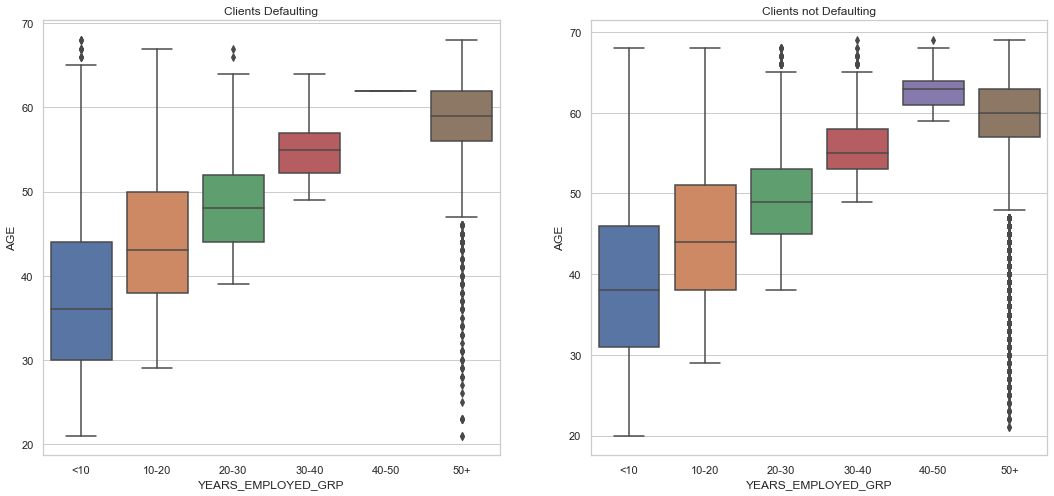

In [184]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.set(style="whitegrid")
plt.title('Clients Defaulting')
sns.boxplot("YEARS_EMPLOYED_GRP","AGE",data=Target_1)
plt.subplot(122)
plt.title('Clients not Defaulting')
sns.boxplot("YEARS_EMPLOYED_GRP","AGE",data=Target_0)
plt.show()

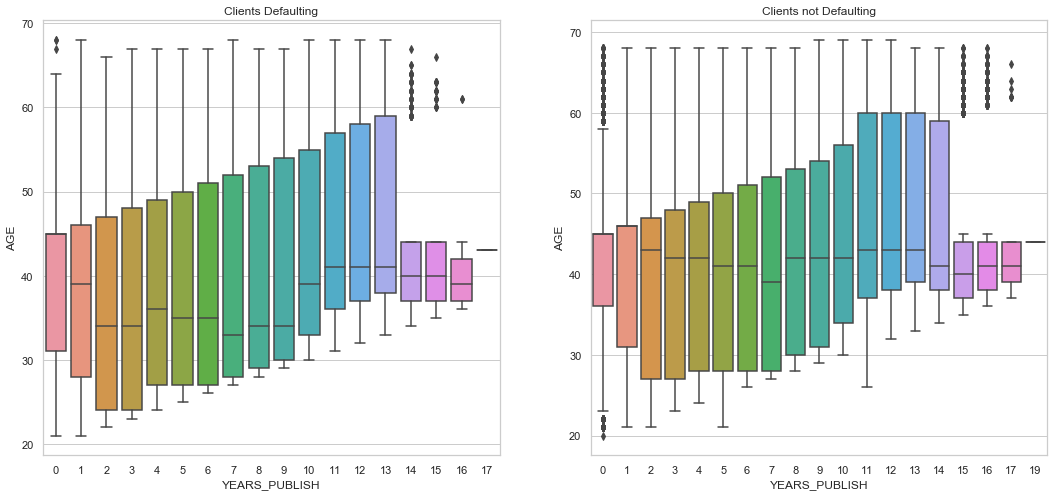

In [185]:
#Bivariate Analysis of YEARS_PUBLISH and AGE w.r.t Target


plt.figure(figsize=(18,8))
plt.subplot(121)
sns.set(style="whitegrid")
plt.title('Clients Defaulting')
sns.boxplot("YEARS_PUBLISH","AGE",data=Target_1)
plt.subplot(122)
plt.title('Clients not Defaulting')
sns.boxplot("YEARS_PUBLISH","AGE",data=Target_0)
plt.show()

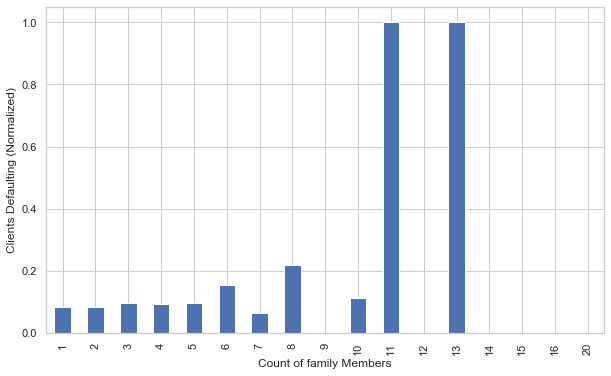

In [198]:
#Check trend of clients defaulting based on count of family memebers
plt.figure(figsize=[10,6])
apps_final_mrg.groupby('CNT_FAM_MEMBERS')['TARGET'].mean().plot.bar()
plt.xlabel('Count of family Members')
plt.ylabel('Clients Defaulting (Normalized)')
plt.show()

## Previous Application Data Analysis

In [128]:
#Check data of previous application
prev_apps= pd.read_csv('previous_application.csv')
prev_apps.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430000,17145.000000,17145.000000,0.000000,17145.000000,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000000,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.000000
1,2802425,108129,Cash loans,25188.615000,607500.000000,679671.000000,nan,607500.000000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000000,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.000000
2,2523466,122040,Cash loans,15060.735000,112500.000000,136444.500000,nan,112500.000000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,high,Cash X-Sell: high,365243.000000,-271.000000,59.000000,365243.000000,365243.000000,1.000000
3,2819243,176158,Cash loans,47041.335000,450000.000000,470790.000000,nan,450000.000000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000000,middle,Cash X-Sell: middle,365243.000000,-482.000000,-152.000000,-182.000000,-177.000000,1.000000
4,1784265,202054,Cash loans,31924.395000,337500.000000,404055.000000,nan,337500.000000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [129]:
#Check info and properties of prev_app dataframe
print(prev_apps.shape)
print(prev_apps.info())

(1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null obje

#### Check for Null Values in Previous Application dataframe

In [130]:
#Null check columnwise %
round(100*(prev_apps.isnull().sum()/len(prev_apps)),2)

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                   22.290000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000000
AMT_DOWN_PAYMENT              53.640000
AMT_GOODS_PRICE               23.080000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
RATE_DOWN_PAYMENT             53.640000
RATE_INTEREST_PRIMARY         99.640000
RATE_INTEREST_PRIVILEGED      99.640000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_TYPE_SUITE               49.120000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000


#### Fixing rows and columns

In [131]:
# Drop Columns with Highest Null Percentage Valus(greater than 40%)
prev_apps.drop(prev_apps.columns[prev_apps.isnull().sum()/len(prev_apps)*100 >= 40], axis=1, inplace=True)
prev_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAYMENT_TYPE              1670214 non-null object
CODE_REJECT_REASON             1670214 non-null object
NAME_CLI

In [132]:
# Dropping Unnecessary Columns which are not required for Analysis
prev_apps.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','SELLERPLACE_AREA','CNT_PAYMENT','NAME_YIELD_GROUP','PRODUCT_COMBINATION','NAME_SELLER_INDUSTRY'], axis=1, inplace =True)

In [133]:
#Check remaining columns
prev_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 11 columns):
SK_ID_PREV                1670214 non-null int64
SK_ID_CURR                1670214 non-null int64
NAME_CONTRACT_TYPE        1670214 non-null object
AMT_ANNUITY               1297979 non-null float64
AMT_APPLICATION           1670214 non-null float64
AMT_CREDIT                1670213 non-null float64
AMT_GOODS_PRICE           1284699 non-null float64
NAME_CASH_LOAN_PURPOSE    1670214 non-null object
NAME_CONTRACT_STATUS      1670214 non-null object
CODE_REJECT_REASON        1670214 non-null object
CHANNEL_TYPE              1670214 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 140.2+ MB


In [134]:
#Check null value % in remaining columns
round(100*(prev_apps.isnull().sum()/len(prev_apps)), 2)

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NAME_CONTRACT_TYPE        0.000000
AMT_ANNUITY              22.290000
AMT_APPLICATION           0.000000
AMT_CREDIT                0.000000
AMT_GOODS_PRICE          23.080000
NAME_CASH_LOAN_PURPOSE    0.000000
NAME_CONTRACT_STATUS      0.000000
CODE_REJECT_REASON        0.000000
CHANNEL_TYPE              0.000000
dtype: float64

## Merging two Dataframes

In [135]:
#Merge the Application dataframe and the previous application data based on SK_ID_CURR
apps_final_mrg = pd.merge(left=apps_final, right=prev_apps, how='inner', on='SK_ID_CURR')
apps_final_mrg.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,YEARS_EMPLOYED,YEARS_PUBLISH,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CHANNEL_TYPE
0,100002,1,Cash loans,M,202500.000000,24700.500000,351000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,2120,1,1,0,Laborers,1,2,0,0,0.262949,0.139376,1134,25,1,5,1038818,Consumer loans,9251.775000,179055.000000,179055.000000,179055.000000,XAP,Approved,XAP,Stone
1,100003,0,Cash loans,F,270000.000000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,16765,1188,291,1,1,0,Core staff,2,1,0,0,0.622246,0.000000,828,45,3,0,1810518,Cash loans,98356.995000,900000.000000,1035882.000000,900000.000000,XNA,Approved,XAP,Credit and cash offices
2,100003,0,Cash loans,F,270000.000000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,16765,1188,291,1,1,0,Core staff,2,1,0,0,0.622246,0.000000,828,45,3,0,2636178,Consumer loans,64567.665000,337500.000000,348637.500000,337500.000000,XAP,Approved,XAP,Stone
3,100003,0,Cash loans,F,270000.000000,35698.500000,1129500.000000,State servant,Higher education,Married,House / apartment,16765,1188,291,1,1,0,Core staff,2,1,0,0,0.622246,0.000000,828,45,3,0,2396755,Consumer loans,6737.310000,68809.500000,68053.500000,68809.500000,XAP,Approved,XAP,Country-wide
4,100004,0,Revolving loans,M,67500.000000,6750.000000,135000.000000,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,2531,1,1,0,Laborers,1,2,0,0,0.555912,0.729567,815,52,0,6,1564014,Consumer loans,5357.250000,24282.000000,20106.000000,24282.000000,XAP,Approved,XAP,Regional / Local


In [136]:
#Check dataframe info and see if merge is proper
apps_final_mrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 38 columns):
SK_ID_CURR                    1413701 non-null int64
TARGET                        1413701 non-null int64
NAME_CONTRACT_TYPE_x          1413701 non-null object
CODE_GENDER                   1413701 non-null object
AMT_INCOME_TOTAL              1413701 non-null float64
AMT_ANNUITY_x                 1413608 non-null float64
AMT_GOODS_PRICE_x             1413701 non-null float64
NAME_INCOME_TYPE              1413701 non-null object
NAME_EDUCATION_TYPE           1413701 non-null object
NAME_FAMILY_STATUS            1413701 non-null object
NAME_HOUSING_TYPE             1413701 non-null object
DAYS_BIRTH                    1413701 non-null int64
DAYS_EMPLOYED                 1413701 non-null int64
DAYS_ID_PUBLISH               1413701 non-null int64
FLAG_MOBIL                    1413701 non-null int64
FLAG_PHONE                    1413701 non-null int64
FLAG_EMAIL                 

In [137]:
#Since the merge has some common column there have been duplicate columns created.Fix those.

#Rename columns of Application data
apps_final_mrg['NAME_CONTRACT_TYPE_CURRENT'] = apps_final_mrg['NAME_CONTRACT_TYPE_x']
apps_final_mrg['AMT_GOODS_PRICE_CURRENT'] = apps_final_mrg['AMT_GOODS_PRICE_x']
apps_final_mrg['AMT_ANNUITY_CURRENT'] = apps_final_mrg['AMT_ANNUITY_x']

#drop the columns with _X
apps_final_mrg.drop('NAME_CONTRACT_TYPE_x', axis=1, inplace=True)
apps_final_mrg.drop('AMT_ANNUITY_x', axis=1, inplace=True)
apps_final_mrg.drop('AMT_GOODS_PRICE_x', axis=1, inplace=True)

#Rename columns of Previous Application data
apps_final_mrg['NAME_CONTRACT_TYPE_PREVIOUS'] = apps_final_mrg['NAME_CONTRACT_TYPE_y']
apps_final_mrg['AMT_ANNUITY_PREVIOUS'] = apps_final_mrg['AMT_ANNUITY_y']
apps_final_mrg['AMT_GOODS_PRICE_PREVIOUS'] = apps_final_mrg['AMT_GOODS_PRICE_y']

#drop the columns with _Y
apps_final_mrg.drop('NAME_CONTRACT_TYPE_y', axis=1, inplace=True)
apps_final_mrg.drop('AMT_ANNUITY_y', axis=1, inplace=True)
apps_final_mrg.drop('AMT_GOODS_PRICE_y', axis=1, inplace=True)

apps_final_mrg.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,YEARS_EMPLOYED,YEARS_PUBLISH,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CHANNEL_TYPE,NAME_CONTRACT_TYPE_CURRENT,AMT_GOODS_PRICE_CURRENT,AMT_ANNUITY_CURRENT,NAME_CONTRACT_TYPE_PREVIOUS,AMT_ANNUITY_PREVIOUS,AMT_GOODS_PRICE_PREVIOUS
0,100002,1,M,202500.000000,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,2120,1,1,0,Laborers,1,2,0,0,0.262949,0.139376,1134,25,1,5,1038818,179055.000000,179055.000000,XAP,Approved,XAP,Stone,Cash loans,351000.000000,24700.500000,Consumer loans,9251.775000,179055.000000
1,100003,0,F,270000.000000,State servant,Higher education,Married,House / apartment,16765,1188,291,1,1,0,Core staff,2,1,0,0,0.622246,0.000000,828,45,3,0,1810518,900000.000000,1035882.000000,XNA,Approved,XAP,Credit and cash offices,Cash loans,1129500.000000,35698.500000,Cash loans,98356.995000,900000.000000
2,100003,0,F,270000.000000,State servant,Higher education,Married,House / apartment,16765,1188,291,1,1,0,Core staff,2,1,0,0,0.622246,0.000000,828,45,3,0,2636178,337500.000000,348637.500000,XAP,Approved,XAP,Stone,Cash loans,1129500.000000,35698.500000,Consumer loans,64567.665000,337500.000000
3,100003,0,F,270000.000000,State servant,Higher education,Married,House / apartment,16765,1188,291,1,1,0,Core staff,2,1,0,0,0.622246,0.000000,828,45,3,0,2396755,68809.500000,68053.500000,XAP,Approved,XAP,Country-wide,Cash loans,1129500.000000,35698.500000,Consumer loans,6737.310000,68809.500000
4,100004,0,M,67500.000000,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,2531,1,1,0,Laborers,1,2,0,0,0.555912,0.729567,815,52,0,6,1564014,24282.000000,20106.000000,XAP,Approved,XAP,Regional / Local,Revolving loans,135000.000000,6750.000000,Consumer loans,5357.250000,24282.000000


In [138]:
apps_final_mrg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 38 columns):
SK_ID_CURR                     1413701 non-null int64
TARGET                         1413701 non-null int64
CODE_GENDER                    1413701 non-null object
AMT_INCOME_TOTAL               1413701 non-null float64
NAME_INCOME_TYPE               1413701 non-null object
NAME_EDUCATION_TYPE            1413701 non-null object
NAME_FAMILY_STATUS             1413701 non-null object
NAME_HOUSING_TYPE              1413701 non-null object
DAYS_BIRTH                     1413701 non-null int64
DAYS_EMPLOYED                  1413701 non-null int64
DAYS_ID_PUBLISH                1413701 non-null int64
FLAG_MOBIL                     1413701 non-null int64
FLAG_PHONE                     1413701 non-null int64
FLAG_EMAIL                     1413701 non-null int64
OCCUPATION_TYPE                1413701 non-null object
CNT_FAM_MEMBERS                1413701 non-null int32
REGION_RATING_C

In [139]:
apps_final_mrg.nunique().sort_values()

FLAG_MOBIL                           1
REG_REGION_NOT_WORK_REGION           2
TARGET                               2
NAME_CONTRACT_TYPE_CURRENT           2
REG_REGION_NOT_LIVE_REGION           2
FLAG_PHONE                           2
FLAG_EMAIL                           2
CODE_GENDER                          3
REGION_RATING_CLIENT                 3
NAME_CONTRACT_STATUS                 4
NAME_CONTRACT_TYPE_PREVIOUS          4
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   5
NAME_HOUSING_TYPE                    6
NAME_INCOME_TYPE                     7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
CNT_FAM_MEMBERS                     17
OCCUPATION_TYPE                     19
YEARS_PUBLISH                       19
NAME_CASH_LOAN_PURPOSE              25
AGE                                 50
YEARS_EMPLOYED                      51
EXT_SOURCE_3                       811
AMT_GOODS_PRICE_CURRENT            987
AMT_INCOME_TOTAL         

#### Univatiate Analysis

In [140]:
#Get distribution of NAME_INCOME_TYPE
apps_final_mrg.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                0.512194
Commercial associate   0.227404
Pensioner              0.193495
State servant          0.066792
Unemployed             0.000087
Student                0.000017
Maternity leave        0.000011
Name: NAME_INCOME_TYPE, dtype: float64

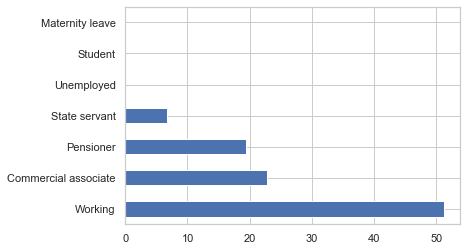

In [141]:
#Plot univate graph of NAME_INCOME_TYPE
(apps_final_mrg.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.barh()
plt.show()

In [142]:
#Get distribution of NAME_FAMILY_STATUS
apps_final_mrg.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                64.434417
Single / not married   13.203428
Civil marriage         10.126399
Separated               6.460914
Widow                   5.774842
Name: NAME_FAMILY_STATUS, dtype: float64

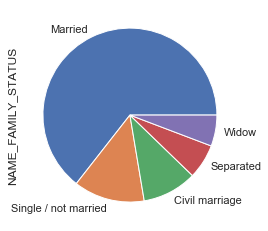

In [143]:
#Plot univate graph of NAME_FAMILY_STATUS
(apps_final_mrg.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.pie()
plt.show()

In [144]:
#Get distribution of NAME_EDUCATION_TYPE
apps_final_mrg.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special   73.417363
Higher education                22.129503
Incomplete higher                3.198060
Lower secondary                  1.214118
Academic degree                  0.040956
Name: NAME_EDUCATION_TYPE, dtype: float64

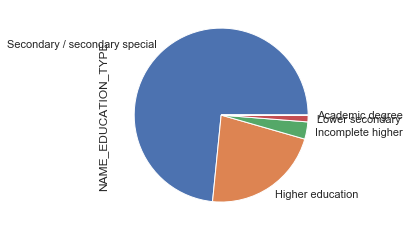

In [145]:
#Plot univate graph of NAME_EDUCATION_TYPE
(apps_final_mrg.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.pie()
plt.show()

In [146]:
#Get distribution of CNT_FAM_MEMBERS
apps_final_mrg.CNT_FAM_MEMBERS.value_counts(normalize=True)*100

2    52.885582
1    21.414005
3    16.492667
4     7.894526
5     1.142462
6     0.131852
7     0.027446
8     0.006508
9     0.001203
12    0.001132
10    0.000637
20    0.000566
11    0.000424
16    0.000354
14    0.000283
13    0.000212
15    0.000141
Name: CNT_FAM_MEMBERS, dtype: float64

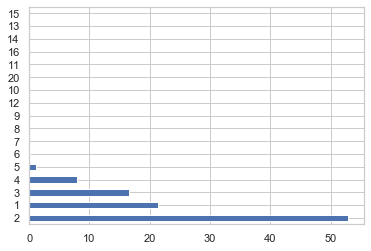

In [147]:
##Plot univate graph of CNT_FAM_MEMBERS
(apps_final_mrg.CNT_FAM_MEMBERS.value_counts(normalize=True)*100).plot.barh()
plt.show()

In [148]:
#Creating Age group column
apps_final_mrg['AGE_GROUP'] = pd.cut(apps_final.AGE[:], [0, 30, 40, 50, 60, 999], labels=["<30","30-40","40-50","50-60","60+"])
apps_final_mrg.head()

,SK_ID_CURR,TARGET,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,YEARS_EMPLOYED,YEARS_PUBLISH,SK_ID_PREV,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CHANNEL_TYPE,NAME_CONTRACT_TYPE_CURRENT,AMT_GOODS_PRICE_CURRENT,AMT_ANNUITY_CURRENT,NAME_CONTRACT_TYPE_PREVIOUS,AMT_ANNUITY_PREVIOUS,AMT_GOODS_PRICE_PREVIOUS,AGE_GROUP
0,100002,1,M,202500.000000,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,2120,1,1,0,Laborers,1,2,0,0,0.262949,0.139376,1134,25,1,5,1038818,179055.000000,179055.000000,XAP,Approved,XAP,Stone,Cash loans,351000.000000,24700.500000,Consumer loans,9251.775000,179055.000000,<30
1,100003,0,F,270000.000000,State servant,Higher education,Married,House / apartment,16765,1188,291,1,1,0,Core staff,2,1,0,0,0.622246,0.000000,828,45,3,0,1810518,900000.000000,1035882.000000,XNA,Approved,XAP,Credit and cash offices,Cash loans,1129500.000000,35698.500000,Cash loans,98356.995000,900000.000000,40-50
2,100003,0,F,270000.000000,State servant,Higher education,Married,House / apartment,16765,1188,291,1,1,0,Core staff,2,1,0,0,0.622246,0.000000,828,45,3,0,2636178,337500.000000,348637.500000,XAP,Approved,XAP,Stone,Cash loans,1129500.000000,35698.500000,Consumer loans,64567.665000,337500.000000,50-60
3,100003,0,F,270000.000000,State servant,Higher education,Married,House / apartment,16765,1188,291,1,1,0,Core staff,2,1,0,0,0.622246,0.000000,828,45,3,0,2396755,68809.500000,68053.500000,XAP,Approved,XAP,Country-wide,Cash loans,1129500.000000,35698.500000,Consumer loans,6737.310000,68809.500000,50-60
4,100004,0,M,67500.000000,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,2531,1,1,0,Laborers,1,2,0,0,0.555912,0.729567,815,52,0,6,1564014,24282.000000,20106.000000,XAP,Approved,XAP,Regional / Local,Revolving loans,135000.000000,6750.000000,Consumer loans,5357.250000,24282.000000,50-60


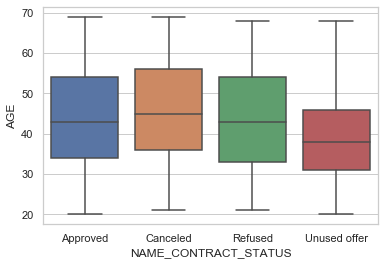

In [149]:
#Trend of NAME_CONTRACT_STATUS w.r.t Age
sns.boxplot(data=apps_final_mrg, x='NAME_CONTRACT_STATUS', y='AGE')
plt.show()

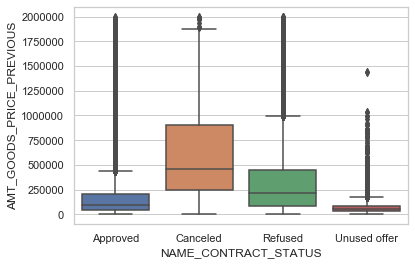

In [150]:
#Trend of NAME_CONTRACT_STATUS w.r.t AMT_GOODS_PRICE_PREVIOUS
apps_final_mrg_goods_prev = apps_final_mrg[~((apps_final_mrg["AMT_GOODS_PRICE_PREVIOUS"] >2000000))]
sns.boxplot(data=apps_final_mrg_goods_prev, x='NAME_CONTRACT_STATUS', y='AMT_GOODS_PRICE_PREVIOUS')
plt.show()

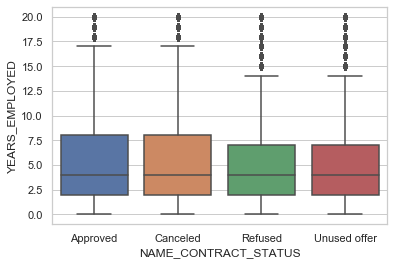

In [151]:
#Trend of NAME_CONTRACT_STATUS w.r.t YEARS_EMPLOYED
apps_final_mrg_yr_emp = apps_final_mrg[~((apps_final_mrg["YEARS_EMPLOYED"] >20))]
sns.boxplot(data=apps_final_mrg_yr_emp, x='NAME_CONTRACT_STATUS', y='YEARS_EMPLOYED')
plt.show()

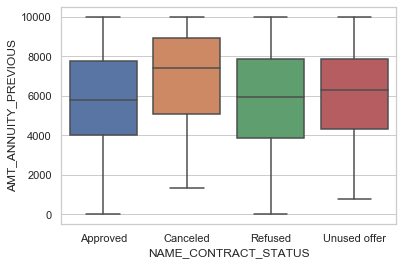

In [152]:
#Trend of NAME_CONTRACT_STATUS w.r.t AMT_ANNUITY_PREVIOUS
apps_final_mrg_annuity_prev = apps_final_mrg[~((apps_final_mrg["AMT_ANNUITY_PREVIOUS"] >10000))]
sns.boxplot(data=apps_final_mrg_annuity_prev, x='NAME_CONTRACT_STATUS', y='AMT_ANNUITY_PREVIOUS')
plt.show()

In [153]:
#Find continuos columns
apps_final_mrg_cont =apps_final_mrg.loc[:,apps_final_mrg.dtypes == float]
collsapp=apps_final_mrg_cont.columns
collsapp
 

Index(['AMT_INCOME_TOTAL', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE_CURRENT', 'AMT_ANNUITY_CURRENT',
       'AMT_ANNUITY_PREVIOUS', 'AMT_GOODS_PRICE_PREVIOUS'],
      dtype='object')

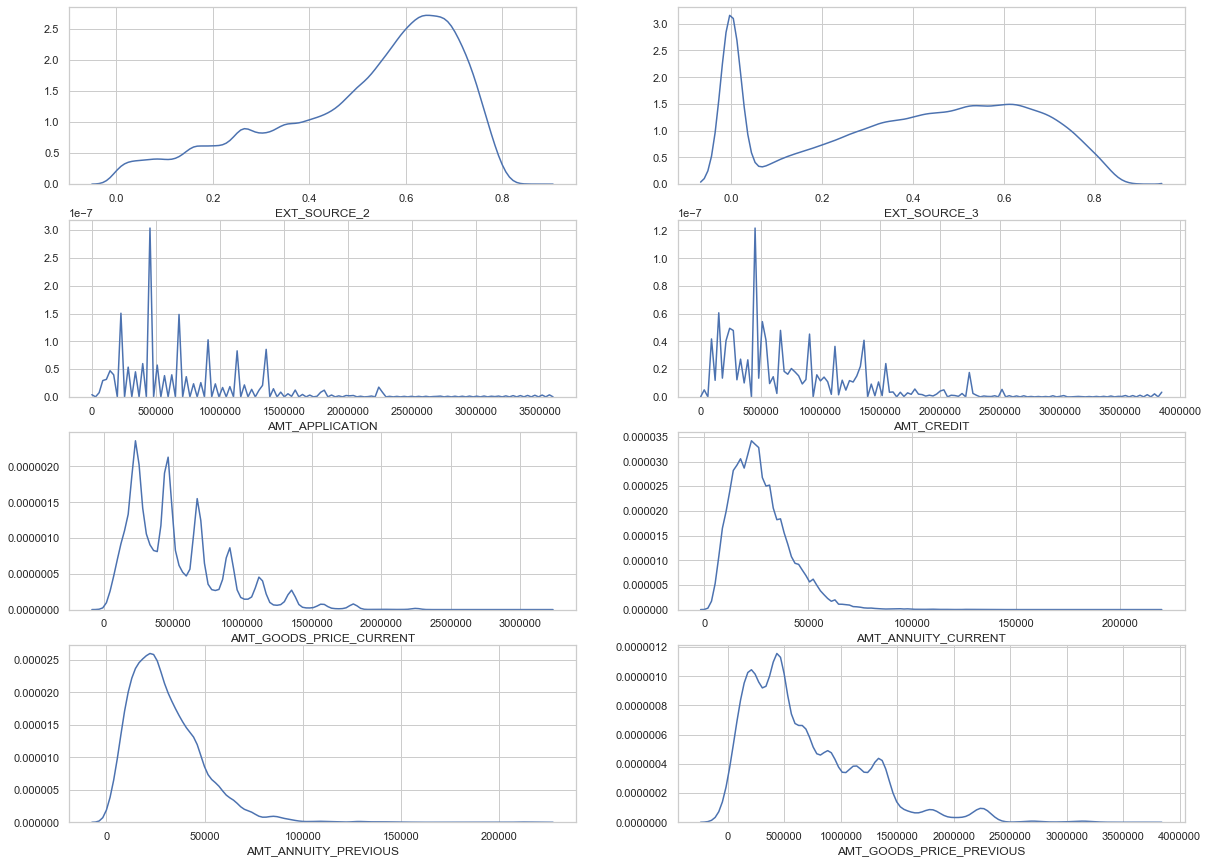

In [154]:
#Univaraite Analysis w.r.t NAME_CONTRACT_STATUS =="Canceled"
canceled_app_mrg =apps_final_mrg[apps_final_mrg.NAME_CONTRACT_STATUS =="Canceled"]
plt.figure(figsize=(20,15))
for coll in range(2,len(collsapp)+1):
    plt.subplot(4,2,coll-1)
    sns.distplot(canceled_app_mrg[collsapp[coll-1]].dropna(),hist=False)
plt.show()

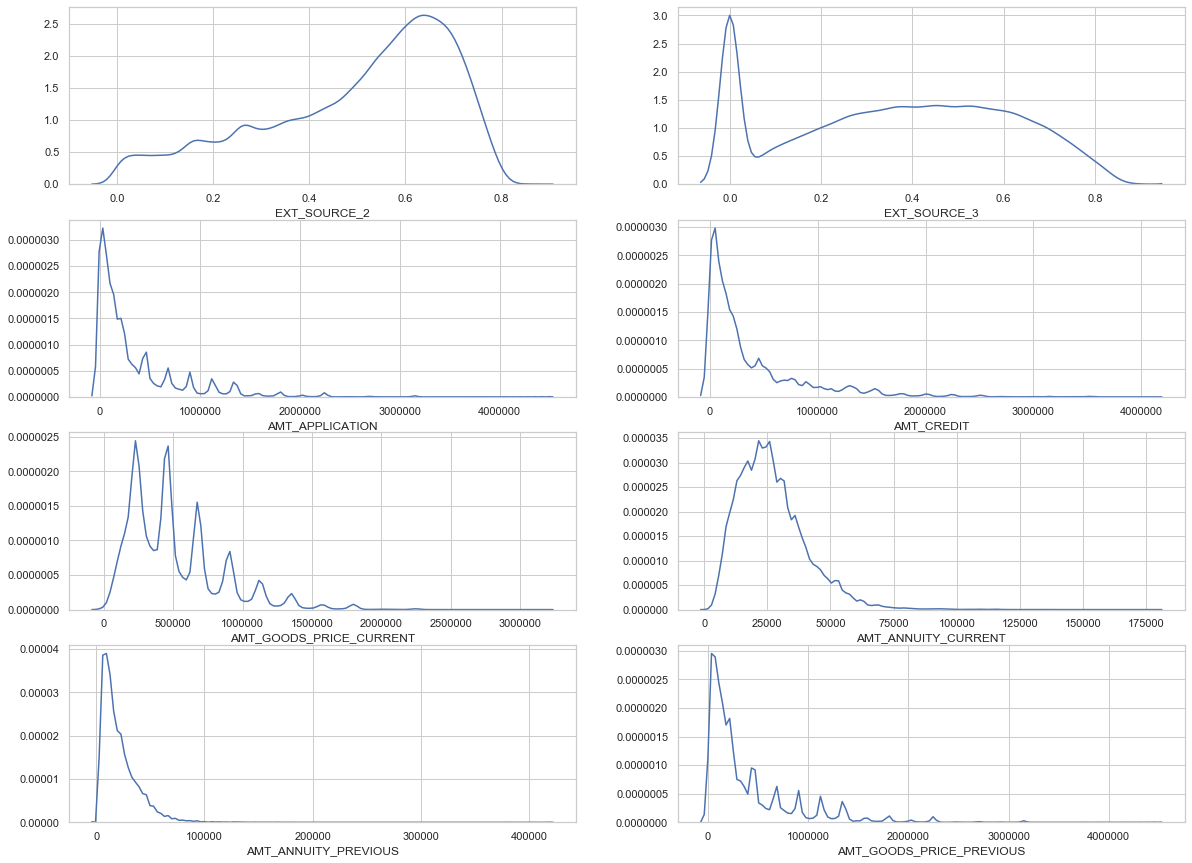

In [155]:
#Univaraite Analysis w.r.t NAME_CONTRACT_STATUS =="REFUSED"
refused_app_mrg =apps_final_mrg[apps_final_mrg.NAME_CONTRACT_STATUS =="Refused"]
plt.figure(figsize=(20,15))
for coll in range(2,len(collsapp)+1):
    plt.subplot(4,2,coll-1)
    sns.distplot(refused_app_mrg[collsapp[coll-1]].dropna(),hist=False)
plt.show()

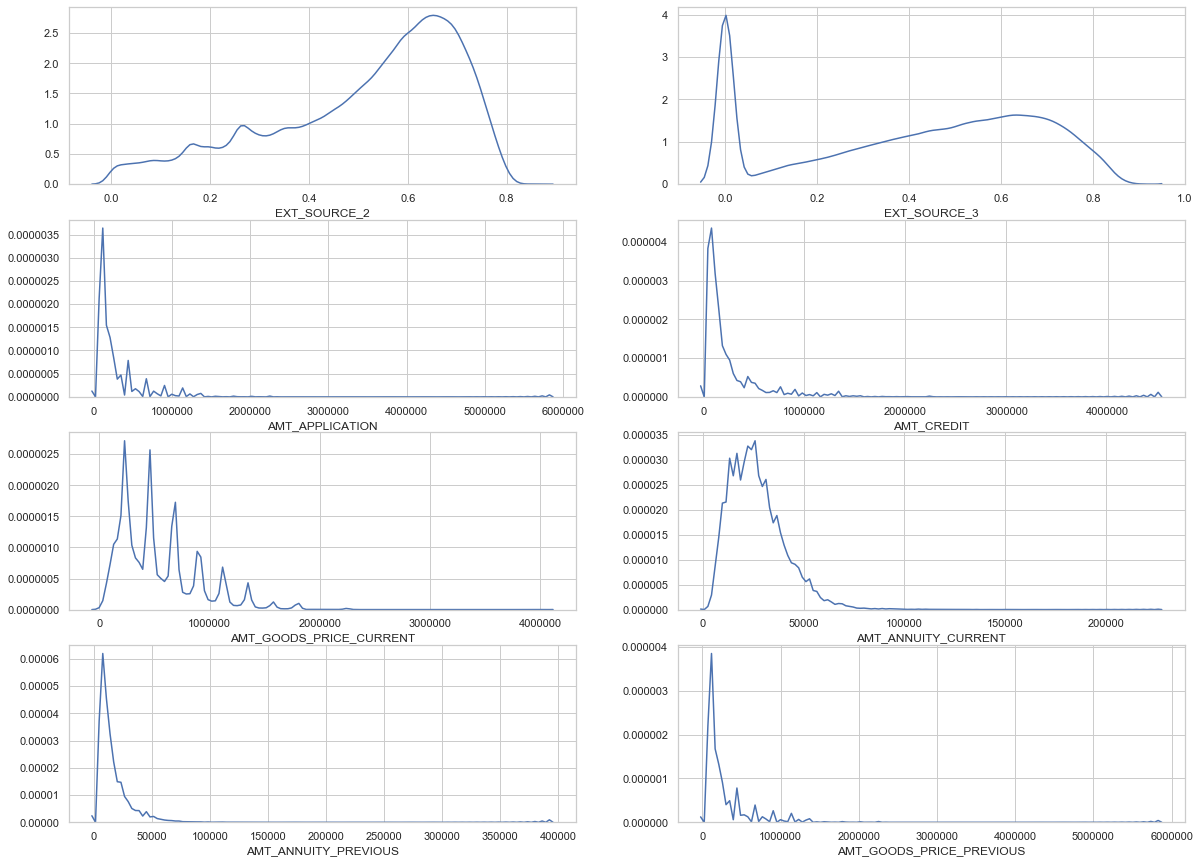

In [156]:
#Univaraite Analysis w.r.t NAME_CONTRACT_STATUS =="APPROVED"
approved_app_mrg =apps_final_mrg[apps_final_mrg.NAME_CONTRACT_STATUS =="Approved"]
plt.figure(figsize=(20,15))
for coll in range(2,len(collsapp)+1):
    plt.subplot(4,2,coll-1)
    sns.distplot(approved_app_mrg[collsapp[coll-1]].dropna(),hist=False)
plt.show()

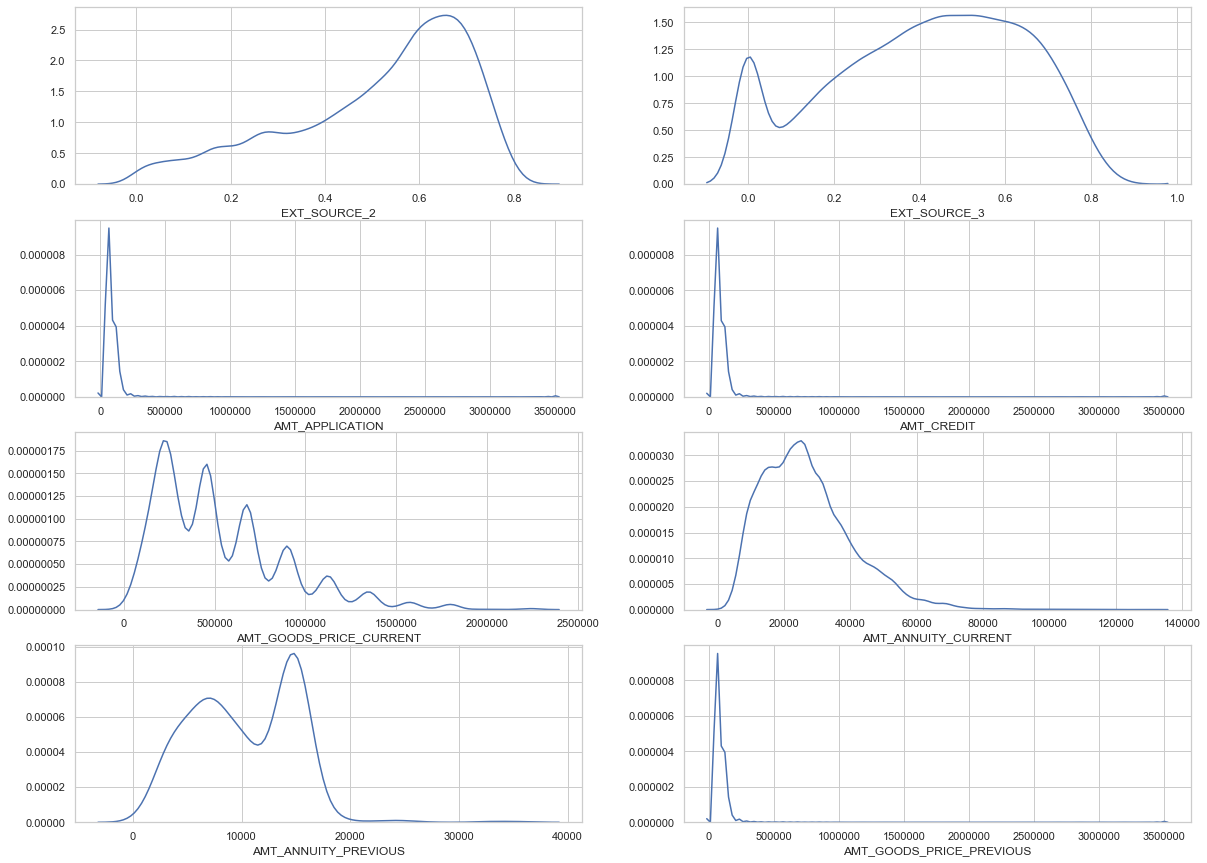

In [157]:
#Univaraite Analysis w.r.t NAME_CONTRACT_STATUS =="UNUSED OFFER"
unused_app_mrg =apps_final_mrg[apps_final_mrg.NAME_CONTRACT_STATUS =="Unused offer"]
plt.figure(figsize=(20,15))
for coll in range(2,len(collsapp)+1):
    plt.subplot(4,2,coll-1)
    sns.distplot(unused_app_mrg[collsapp[coll-1]].dropna(),hist=False)
plt.show()